In [1]:
import sys
import os

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure
from tabulate import tabulate

In [3]:

os.chdir(sys.path[3])
data_general = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()


## Questions analysis based on recovery and non-recovery:

In [4]:
data_general['Q18'].fillna('No',inplace=True)
cols_dict = {'Yes (including if damaged) ':'Recovery','No':'NonRecovery'}
data_general['Q18'].replace(cols_dict,inplace=True)
data_general['Q18'].unique()

array(['NonRecovery', 'Recovery'], dtype=object)

In [5]:
cols = list(cols_dict.values())
per_cols_by_ans = ['per_'+ col for col in cols]
colors =['green','orange']

## All the demographic parameters

In [6]:
data_store= []
# The code run over each tuple
for pair in {'Q2':'part','Q4':'year','Q5':'month','Q6':'day_time','Q7':'is_locked','Q8':'locked_type','Q9':'theft_location','Q10':'is_regi','Q11':'report_loc','Q12':'is_insured','Q14':'is_electric','Q15':'bike_type','Q17':'is_university','Q19':'is_online','Q21':'is_police_assist','Q23':'recovery_loc','Q24':'con_recovery','Q34': 'birth', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education', 'Q39': 'ethnic_origin'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per non/recovery and question_number
    sumy = DataFrame(index=list(data_general[data_general[question_number].notnull()][question_number].unique()))
    for i,name in enumerate(cols):
        rel_demographic = DataFrame(data_general[data_general['Q18'] == name][question_number])

        # Rearrange data
        rel_demographic = rel_demographic.rename(columns={question_number: per_name})
        rel_demographic = rel_demographic[rel_demographic[per_name].notna()].reset_index()

        # calculate absolute and relative count for each veritable
        sumy[[name]] = rel_demographic.groupby(by=[per_name]).count().rename(columns={'index': name})
        sumy.index.name = per_name
    if per_name == 'birth':
        sumy.index = sumy.index.astype('int32')
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))


('Q2', 'part')
('Q4', 'year')
('Q5', 'month')
('Q6', 'day_time')
('Q7', 'is_locked')
('Q8', 'locked_type')
('Q9', 'theft_location')
('Q10', 'is_regi')
('Q11', 'report_loc')
('Q12', 'is_insured')
('Q14', 'is_electric')
('Q15', 'bike_type')
('Q17', 'is_university')
('Q19', 'is_online')
('Q21', 'is_police_assist')
('Q23', 'recovery_loc')
('Q24', 'con_recovery')
('Q34', 'birth')
('Q35', 'gender')
('Q36', 'income')
('Q38', 'education')
('Q39', 'ethnic_origin')


In [7]:
## It combines two real and percentage values into one column
def prep_for_export(test):
    real = test[cols].apply(lambda x: str(int(x))).reset_index(drop=True)
    per = test[per_cols_by_ans].apply(lambda x: ' ('  + str(int(round(x,0))) + '%' + ')').reset_index(drop=True)
    return real + per


part
those are not include in the results presentation since less than 479.25 tolerance  ['A major bicycle part necessary for riding (i.e., saddle, wheel, pedal, or handlebar)']


,Recovery,NonRecovery
part,,
"Entire bicycle (i.e., frame and components)",279 (15%),1610 (85%)


<AxesSubplot:xlabel='part'>

year
those are not include in the results presentation since less than 110.5 tolerance  ['2017' '2018' 'Don’t know/not sure']


,Recovery,NonRecovery
year,,
2019,39 (15%),223 (85%)
2022,14 (9%),145 (91%)
2020,47 (14%),278 (86%)
2021,108 (16%),587 (84%)


<AxesSubplot:xlabel='year'>

for Recovery (8.81) : 2022 is outlier (new_mean:14.96, new_std:0.54)
for NonRecovery (91.19) : 2022 is outlier (new_mean:85.04, new_std:0.54)
month
those are not include in the results presentation since less than 71.65384615384616 tolerance  []


,Recovery,NonRecovery
month,,
Don’t know/not sure,17 (13%),114 (87%)
March,18 (16%),98 (84%)
May,44 (17%),221 (83%)
April,26 (16%),137 (84%)
December,8 (9%),77 (91%)
November,12 (13%),82 (87%)
July,21 (15%),116 (85%)
October,21 (17%),106 (83%)
February,9 (10%),79 (90%)


<AxesSubplot:xlabel='month'>

for Recovery (9.41) : December  is outlier (new_mean:14.81, new_std:2.09)
for NonRecovery (90.59) : December  is outlier (new_mean:85.19, new_std:2.09)
day_time
those are not include in the results presentation since less than 185.5 tolerance  ['Morning (06:00-11:59)']


,Recovery,NonRecovery
day_time,,
Evening (18:00-23:59),32 (14%),195 (86%)
Afternoon (12:00-17:59),57 (16%),305 (84%)
Overnight (00:00-05:59),125 (17%),628 (83%)
Don’t know/not sure,30 (9%),307 (91%)


<AxesSubplot:xlabel='day_time'>

for Recovery (8.9) : Don’t know/not sure is outlier (new_mean:15.48, new_std:1.27)
for NonRecovery (91.1) : Don’t know/not sure is outlier (new_mean:84.52, new_std:1.27)
is_locked
those are not include in the results presentation since less than 232.25 tolerance  ['Yes, locked one or more wheels (i.e., bike locked to itself) '
 'Don’t know/not sure']


,Recovery,NonRecovery
is_locked,,
"Yes, frame locked to a fixed structure (e.g., bike rack)",119 (12%),848 (88%)
"No, unlocked",138 (19%),590 (81%)


<AxesSubplot:xlabel='is_locked'>

locked_type
those are not include in the results presentation since less than 9.589285714285714 tolerance  ['Don’t know/not sure'
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Folding lock '
 '\u200bU-lock      ,Other (please specify):'
 'Cable lock ,Frame lock (aka wheel lock/O-lock/ring lock) '
 '\u200bU-lock      ,Cable lock ,Other (please specify):'
 'Chain-lock with padlock ,Frame lock (aka wheel lock/O-lock/ring lock) '
 '\u200bU-lock      ,Cable lock ,Frame lock (aka wheel lock/O-lock/ring lock) '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Cable lock '
 '\u200bU-lock      ,Two U-Locks ,Chain-lock with padlock '
 '\u200bU-lock      ,Don’t know/not sure' 'Locking skewers '
 'Two U-Locks ,Cable lock ' 'Locking skewers ,Folding lock '
 'Chain-lock with padlock ,Cable lock '
 'Chain-lock with padlock ,Cable lock ,Other (please specify):'
 'Frame lock (aka wheel lock/O-lock/ring lock) '
 'Chain-lock combination

,Recovery,NonRecovery
locked_type,,
​U-lock,33 (12%),243 (88%)
Cable lock,42 (11%),326 (89%)
Folding lock,2 (8%),22 (92%)
"​U-lock ,Chain-lock combination (chain with mini u-lock or integrated locking mechanism)",2 (11%),16 (89%)
Other (please specify):,15 (21%),56 (79%)
Chain-lock combination (chain with mini u-lock or integrated locking mechanism),10 (12%),73 (88%)
"​U-lock ,Cable lock",5 (10%),46 (90%)
Chain-lock with padlock,8 (16%),41 (84%)
"​U-lock ,Locking skewers",2 (18%),9 (82%)


<AxesSubplot:xlabel='locked_type'>

for Recovery (21.13) : Other (please specify): is outlier (new_mean:12.6, new_std:2.95)
for NonRecovery (78.87) : Other (please specify): is outlier (new_mean:87.4, new_std:2.95)
theft_location
those are not include in the results presentation since less than 83.54545454545455 tolerance  ['Condo storage room '
 'Against a street sign, tree, or street furniture (e.g., lamppost, railing, bench, parking meter) '
 'Workplace office ' 'Inside house/apartment ' 'Building lobby ']


,Recovery,NonRecovery
theft_location,,
Outdoor bike rack,40 (12%),285 (88%)
Other (please specify):,52 (19%),219 (81%)
Inside a shed/garage,85 (16%),435 (84%)
Controlled-access bicycle room or enclosed bike locker,10 (10%),88 (90%)
"Outside in the yard or on a balcony, porch, or patio",44 (17%),216 (83%)
Parking garage bike rack/railing/pipe/etc.,16 (11%),131 (89%)


<AxesSubplot:xlabel='theft_location'>

is_regi
those are not include in the results presentation since less than 306.3333333333333 tolerance  ['Don’t know/not sure']


,Recovery,NonRecovery
is_regi,,
No,155 (14%),980 (86%)
Yes,120 (19%),521 (81%)


<AxesSubplot:xlabel='is_regi'>

report_loc
those are not include in the results presentation since less than 61.266666666666666 tolerance  ['I did not report the theft'
 'The police ,Social media (e.g. Instagram, Twitter)'
 'Other (please specify):' 'Social media (e.g. Instagram, Twitter)'
 'The police ,Social media (e.g. Instagram, Twitter),Other (please specify):'
 'A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter)'
 'The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter),Other (please specify):'
 'The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Other (please specify):'
 'A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Other (please specify):'
 'The police ,Other (please specify):'
 'A bicycle registry/recovery system (e.g., Bike Index, a university registration 

,Recovery,NonRecovery
report_loc,,
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter)",103 (17%),519 (83%)
The police,38 (12%),273 (88%)
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",86 (16%),452 (84%)
"A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",10 (10%),89 (90%)


<AxesSubplot:xlabel='report_loc'>

is_insured
those are not include in the results presentation since less than 229.625 tolerance  ['Don’t know/not sure ' 'I prefer to not answer']


,Recovery,NonRecovery
is_insured,,
No,181 (17%),913 (83%)
Yes,93 (14%),558 (86%)


<AxesSubplot:xlabel='is_insured'>

is_electric
those are not include in the results presentation since less than 299.5 tolerance  ['Yes, with pedal-assist (motor activates only while pedalling) '
 'Yes, with pedal-assist and throttle (motor activates while pedalling or by throttle-only)']


,Recovery,NonRecovery
is_electric,,
​No,243 (15%),1331 (85%)


<AxesSubplot:xlabel='is_electric'>

bike_type
those are not include in the results presentation since less than 69.15384615384616 tolerance  ['BMX ' 'Folding  ' 'Cruiser ' 'Delivery/Cargo' 'Tandem ' 'Fixed gear'
 'Tricycle or quadricycle' 'Don’t know/not sure' 'Recumbent ']


,Recovery,NonRecovery
bike_type,,
Mountain,94 (17%),454 (83%)
Gravel/cyclocross,21 (19%),90 (81%)
Road,60 (16%),318 (84%)
Hybrid/City/Dutch,70 (13%),478 (87%)


<AxesSubplot:xlabel='bike_type'>

for Recovery (12.77) : Hybrid/City/Dutch  is outlier (new_mean:17.32, new_std:1.53)
for NonRecovery (87.23) : Hybrid/City/Dutch  is outlier (new_mean:82.68, new_std:1.53)
is_university
those are not include in the results presentation since less than 456.0 tolerance  ['Yes']


,Recovery,NonRecovery
is_university,,
No,248 (16%),1329 (84%)


<AxesSubplot:xlabel='is_university'>

is_online
those are not include in the results presentation since less than 20.071428571428573 tolerance  ['Yes, on OfferUp ' 'Yes, on other website (please specify):'
 'Yes, on Kijiji ' 'Yes, on Craigslist ']


,Recovery,NonRecovery
is_online,,
​No,167 (100%),0 (0%)
Don’t know/not sure,36 (97%),1 (3%)
"Yes, on Facebook Marketplace",23 (100%),0 (0%)


<AxesSubplot:xlabel='is_online'>

for Recovery (97.3) : Don’t know/not sure is outlier (new_mean:100.0, new_std:0.0)
for NonRecovery (2.7) : Don’t know/not sure is outlier (new_mean:0.0, new_std:0.0)
is_police_assist
those are not include in the results presentation since less than 46.833333333333336 tolerance  []


,Recovery,NonRecovery
is_police_assist,,
"Yes, in-person support",110 (100%),0 (0%)
​No,102 (99%),1 (1%)
"Yes, phone or email support",68 (100%),0 (0%)


<AxesSubplot:xlabel='is_police_assist'>

for Recovery (99.03) : ​No  is outlier (new_mean:100.0, new_std:0.0)
for NonRecovery (0.97) : ​No  is outlier (new_mean:0.0, new_std:0.0)
recovery_loc
those are not include in the results presentation since less than 10.035714285714286 tolerance  ['Transit rail station/bus stop ' 'University/college '
 'Community centre/church ' 'Parking garage' 'Stadium/sports facility '
 'Hospital/government building ' 'Industry or factory ']


,Recovery,NonRecovery
recovery_loc,,
Downtown business/office/shopping district,22 (100%),0 (0%)
Local business/office/shopping district,38 (100%),0 (0%)
"Residential zone (e.g., house, townhouse, apartment suite)",101 (100%),0 (0%)
Other (please specify):,43 (98%),1 (2%)
Shopping mall,11 (100%),0 (0%)
Don’t know/not sure,33 (100%),0 (0%)
Park/playing field/golf course/empty lot/green space,14 (100%),0 (0%)


<AxesSubplot:xlabel='recovery_loc'>

for Recovery (97.73) : Other (please specify): is outlier (new_mean:100.0, new_std:0.0)
for NonRecovery (2.27) : Other (please specify): is outlier (new_mean:0.0, new_std:0.0)
con_recovery
those are not include in the results presentation since less than 14.875 tolerance  ['Salvage/junk– bicycle was not rideable or repairable'
 'Don’t know/not sure']


,Recovery,NonRecovery
con_recovery,,
Rideable– bicycle was safe to operate and immediately usable,63 (100%),0 (0%)
Repairable– bicycle was damaged and repairs were required before being rideable,45 (100%),0 (0%)


<AxesSubplot:xlabel='con_recovery'>

birth
those are not include in the results presentation since less than 11.694444444444445 tolerance  [1944 1949 1950 1948 2006 2010 1960 1954 1951 1953 1952 2007 1961 1938
 1945 2005 2004 1946 2003 1935 2008 2009 1947 2013 1943 2012]


,Recovery,NonRecovery
birth,,
1996,3 (8%),34 (92%)
1973,5 (17%),24 (83%)
1959,3 (14%),18 (86%)
1972,3 (9%),30 (91%)
1971,5 (16%),27 (84%)
1970,6 (16%),31 (84%)
1969,4 (12%),28 (88%)
1985,7 (13%),48 (87%)
1987,11 (19%),47 (81%)


<AxesSubplot:xlabel='birth'>

for Recovery (42.86) : 1955 is outlier (new_mean:15.11, new_std:5.71)
for NonRecovery (57.14) : 1955 is outlier (new_mean:84.89, new_std:5.71)
gender
those are not include in the results presentation since less than 216.25 tolerance  ['Prefer not to say' 'Non-binary / third gender']


,Recovery,NonRecovery
gender,,
Woman,99 (16%),515 (84%)
Man,165 (16%),895 (84%)


<AxesSubplot:xlabel='gender'>

income
those are not include in the results presentation since less than 86.35 tolerance  ['Under $20,000 per year' 'Don’t know/not sure']


,Recovery,NonRecovery
income,,
"$200,000 or more per year",51 (14%),311 (86%)
I prefer to not answer,25 (16%),135 (84%)
"Between $100,000 and $149,999 per year",44 (16%),228 (84%)
"Between $50,000 and $74,999 per year",38 (17%),185 (83%)
"Between $75,000 and $99,999 per year",37 (16%),194 (84%)
"Between $150,000 and $199,999 per year",30 (17%),144 (83%)
"Between $35,000 and $49,999 per year",12 (13%),82 (87%)
"Between $20,000 and $34,999 per year",17 (15%),94 (85%)


<AxesSubplot:xlabel='income'>

for Recovery (12.77) : Between $35,000 and $49,999 per year is outlier (new_mean:15.93, new_std:1.07)
for NonRecovery (87.23) : Between $35,000 and $49,999 per year is outlier (new_mean:84.07, new_std:1.07)
education
those are not include in the results presentation since less than 123.64285714285714 tolerance  ['Associate’s/vocational/technical\u202fdegree (2- or 3-year degree, trades certificate) \u202f \u202f \u202f \u202f \u202f \u202f \u202f \t '
 'Graduated high school (i.e., High school diploma)\u202f \u202f \u202f \u202f \t '
 'Some high school or less\u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \t '
 'I prefer to not answer']


,Recovery,NonRecovery
education,,
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",104 (15%),610 (85%)
Bachelor’s degree (university 4-year degree) \t,105 (16%),567 (84%)
Some university (no degree),27 (22%),97 (78%)


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='education'>

for Recovery (21.77) : Some university (no degree)  is outlier (new_mean:15.1, new_std:0.75)
for NonRecovery (78.23) : Some university (no degree)  is outlier (new_mean:84.9, new_std:0.75)
ethnic_origin
those are not include in the results presentation since less than 71.66666666666667 tolerance  ['Other (please specify):'
 'African (e.g., Moroccan, Ghanaian, South African, etc.) '
 'Central/South American (e.g., Mexican, Salvadorian, Argentinian, etc.) '
 'South Asian (e.g., Punjabi, Indian, Pakistani, etc.) '
 'Indigenous (First Nations, Metis, Inuk/Inuit, etc.)'
 'Middle Eastern (e.g., Lebanese, Iranian, Syrian, etc.) '
 'Caribbean (e.g., Cuban, Jamaican, Bajan, etc.) '
 'Oceanian (e.g., Australian, New Zealander, etc.) ']


C:\Users\Achituv\AppData\Local\Temp\ipykernel_11272\2051317960.py:26: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('python/notebooks/output/per_recovery/figs/'+q_name+'.png')


,Recovery,NonRecovery
ethnic_origin,,
"European (e.g., British Isles, German, French, Greek, Italian, etc.)",207 (16%),1064 (84%)
Multi-ethnic (2+ ethnic groups),17 (17%),82 (83%)
I prefer to not answer,13 (17%),65 (83%)
"Asian (e.g., Chinese, Filipino, Korean, etc.)",9 (11%),75 (89%)


<AxesSubplot:xlabel='ethnic_origin'>

for Recovery (10.71) : Asian (e.g., Chinese, Filipino, Korean, etc.)  is outlier (new_mean:16.71, new_std:0.44)
for NonRecovery (89.29) : Asian (e.g., Chinese, Filipino, Korean, etc.)  is outlier (new_mean:83.29, new_std:0.44)


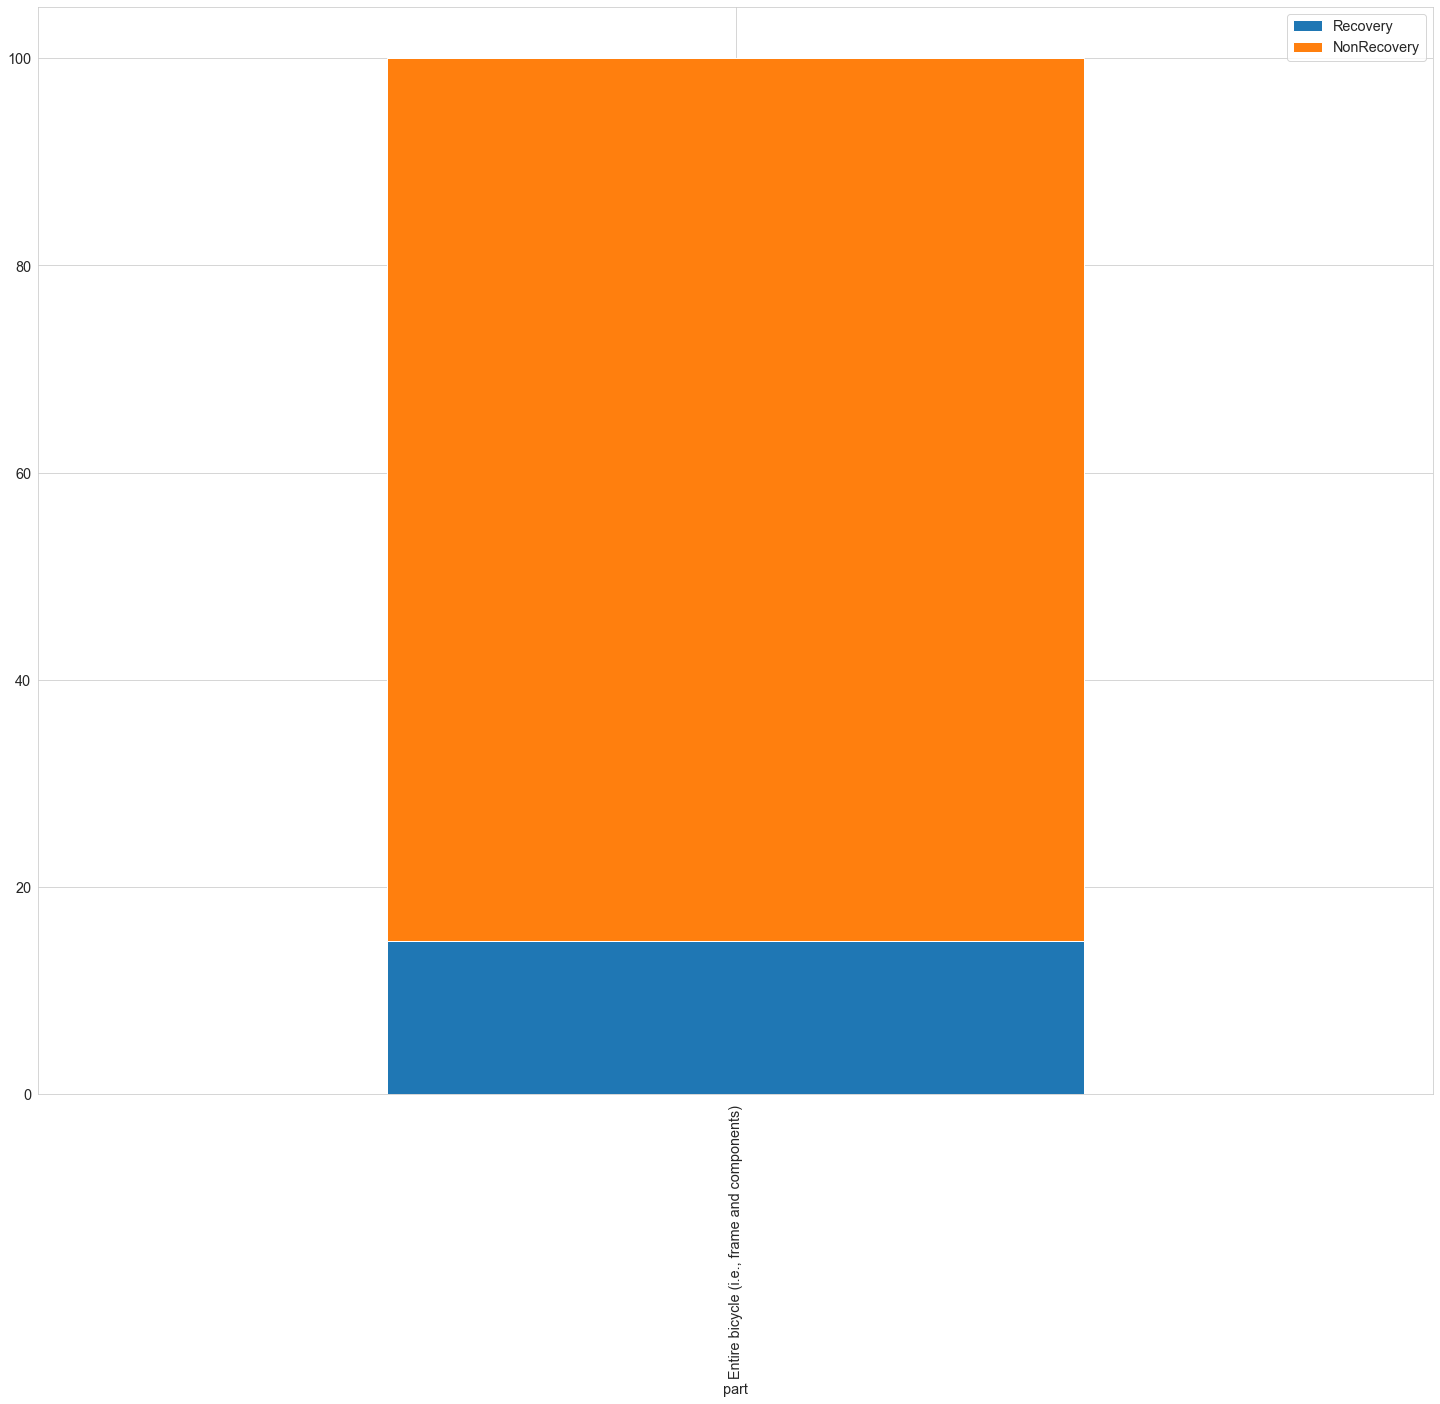

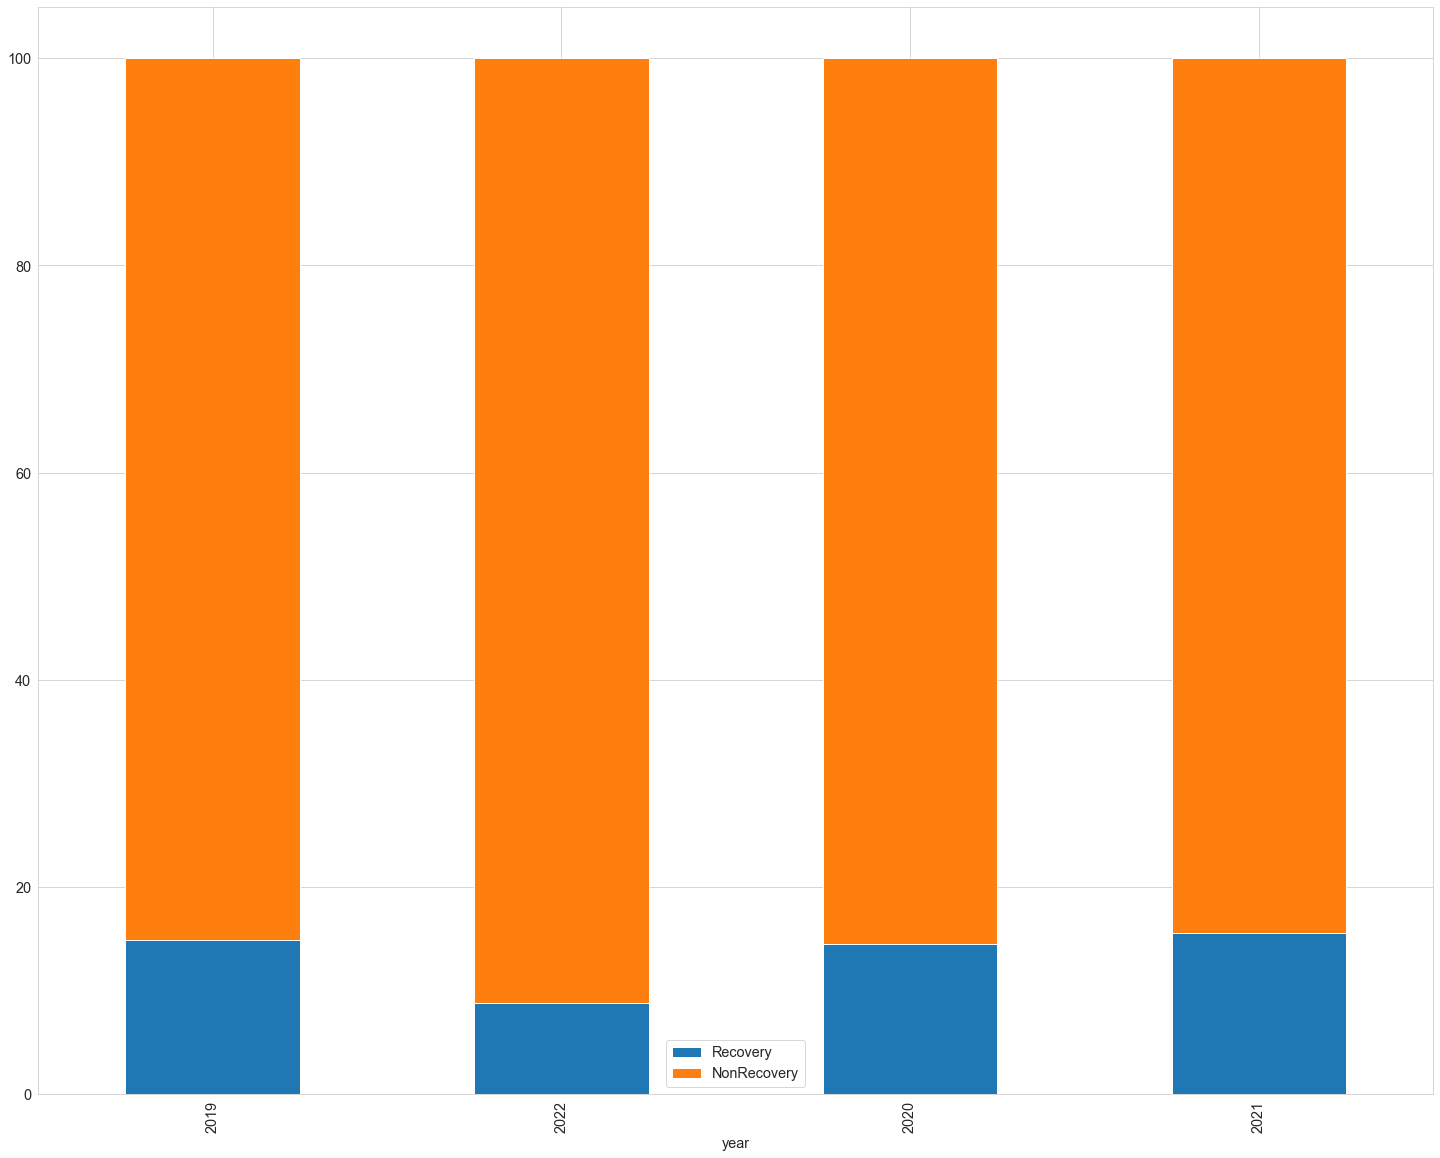

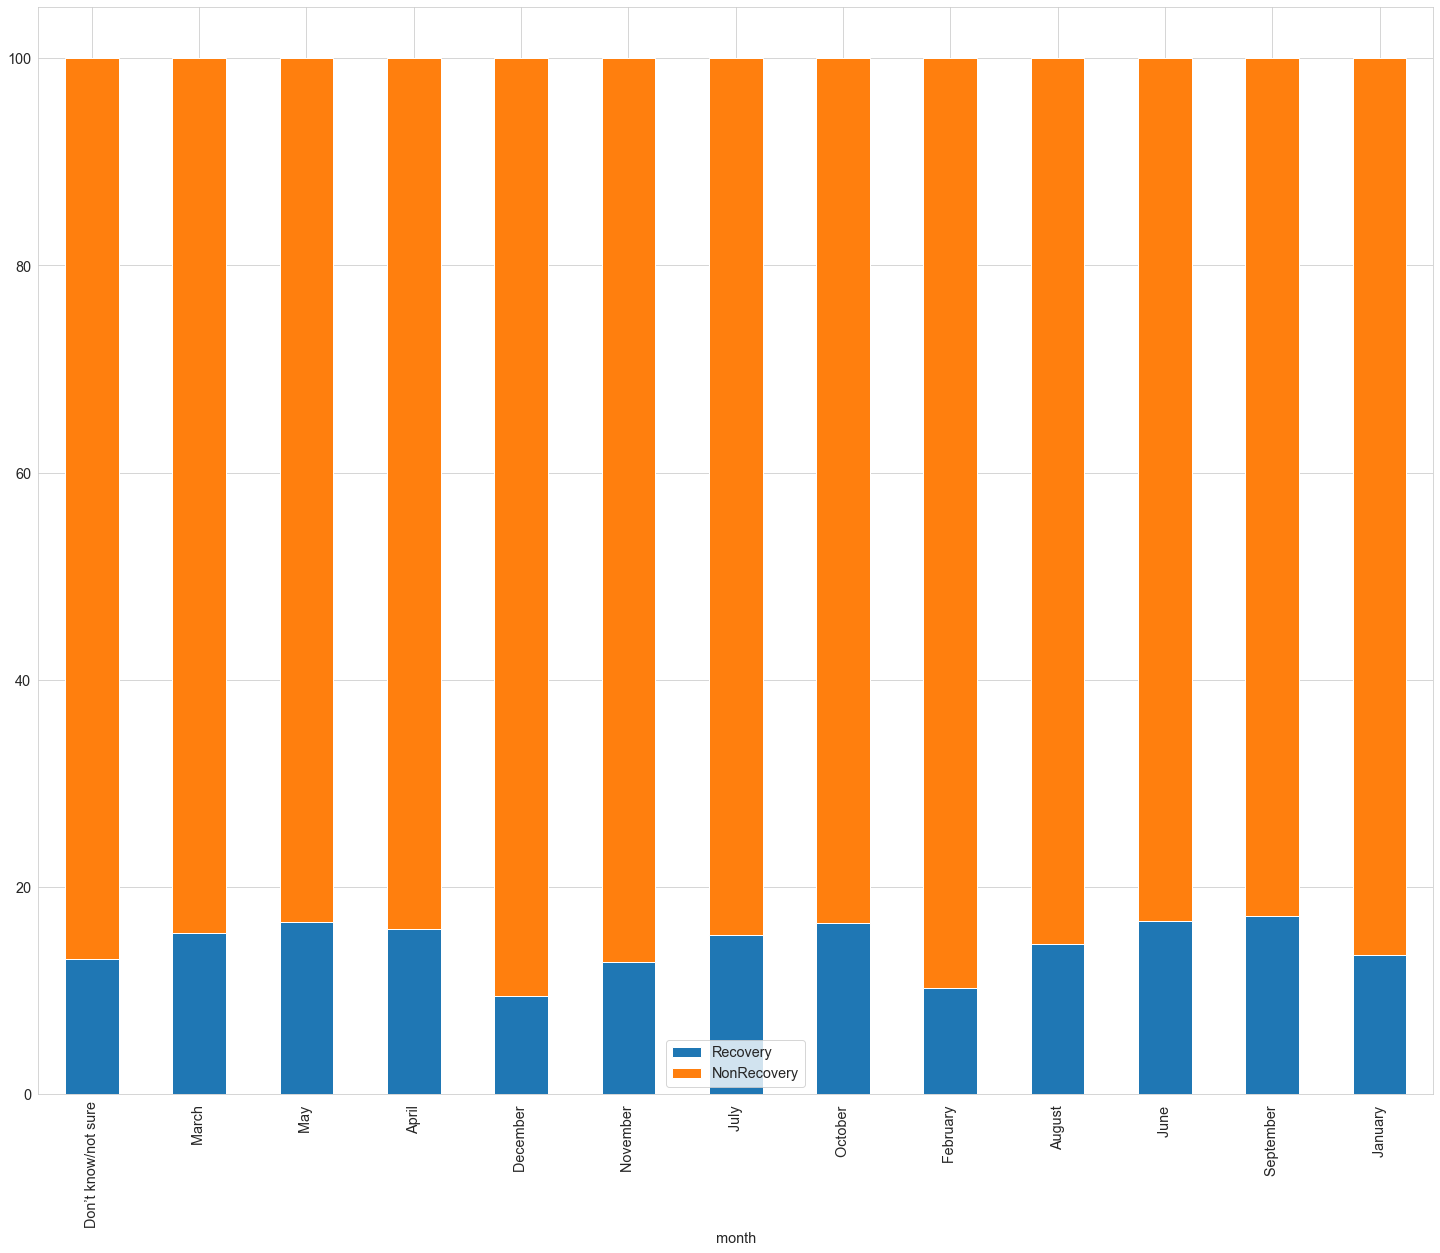

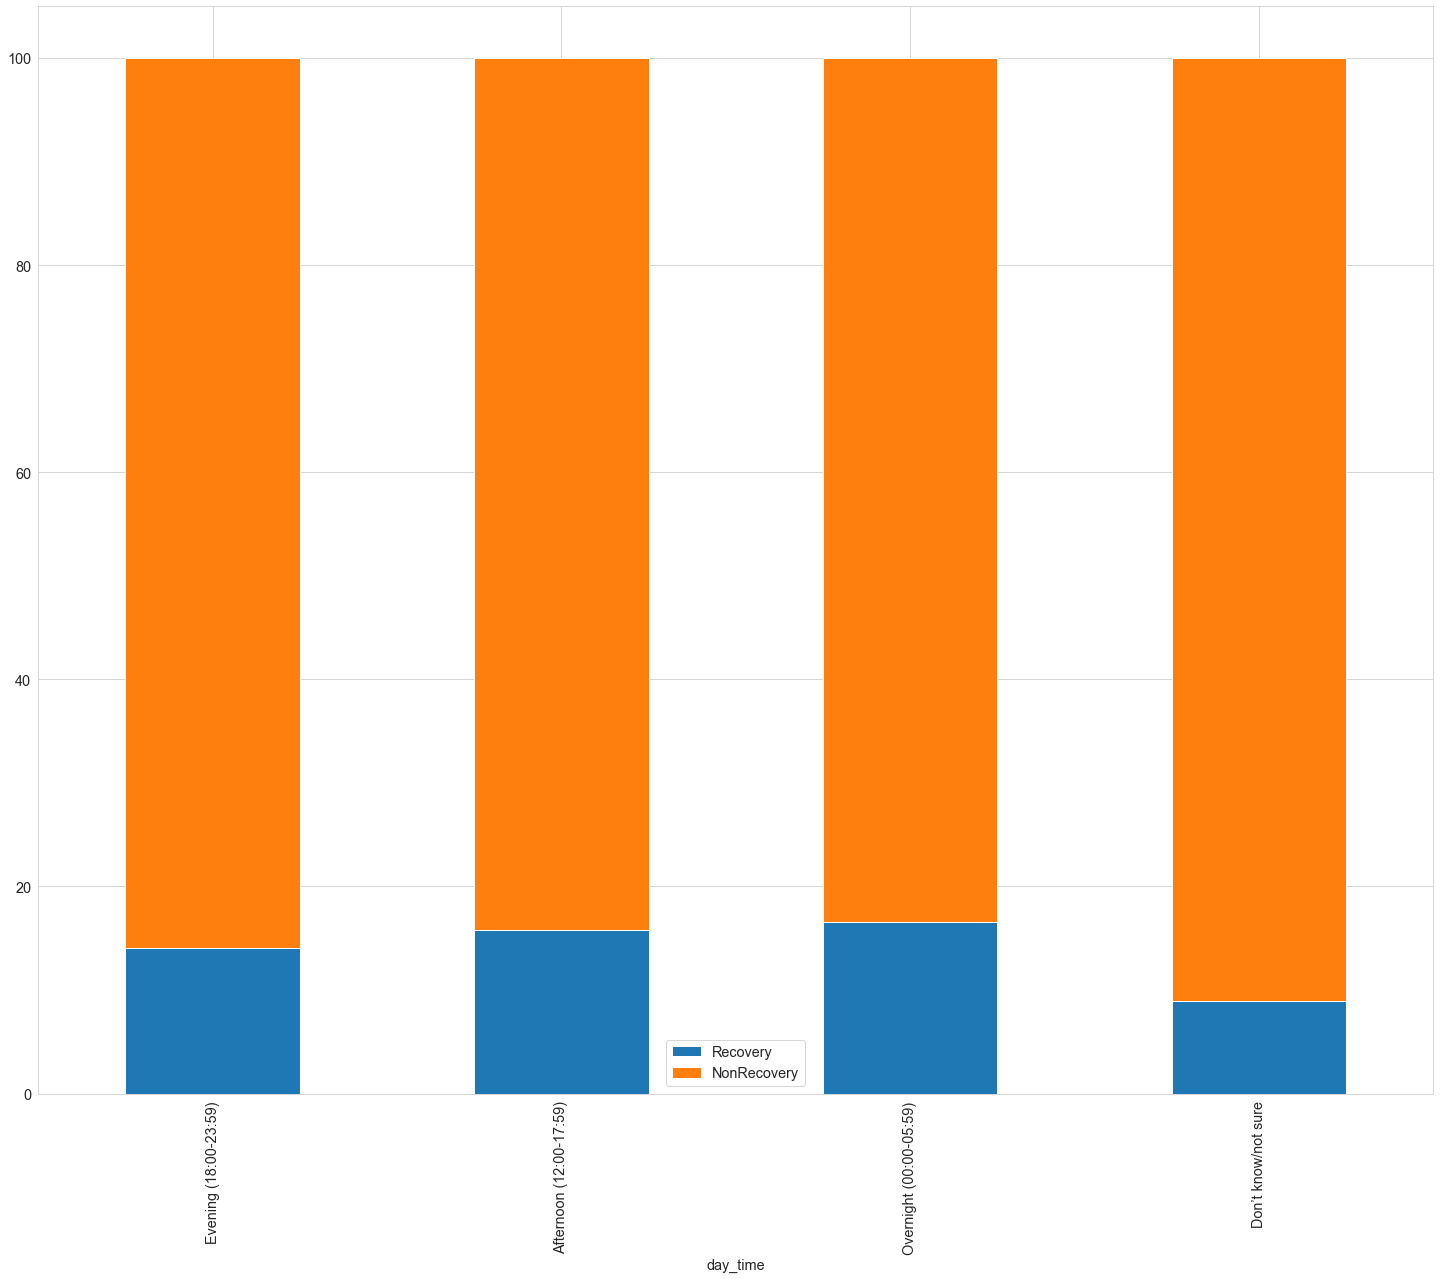

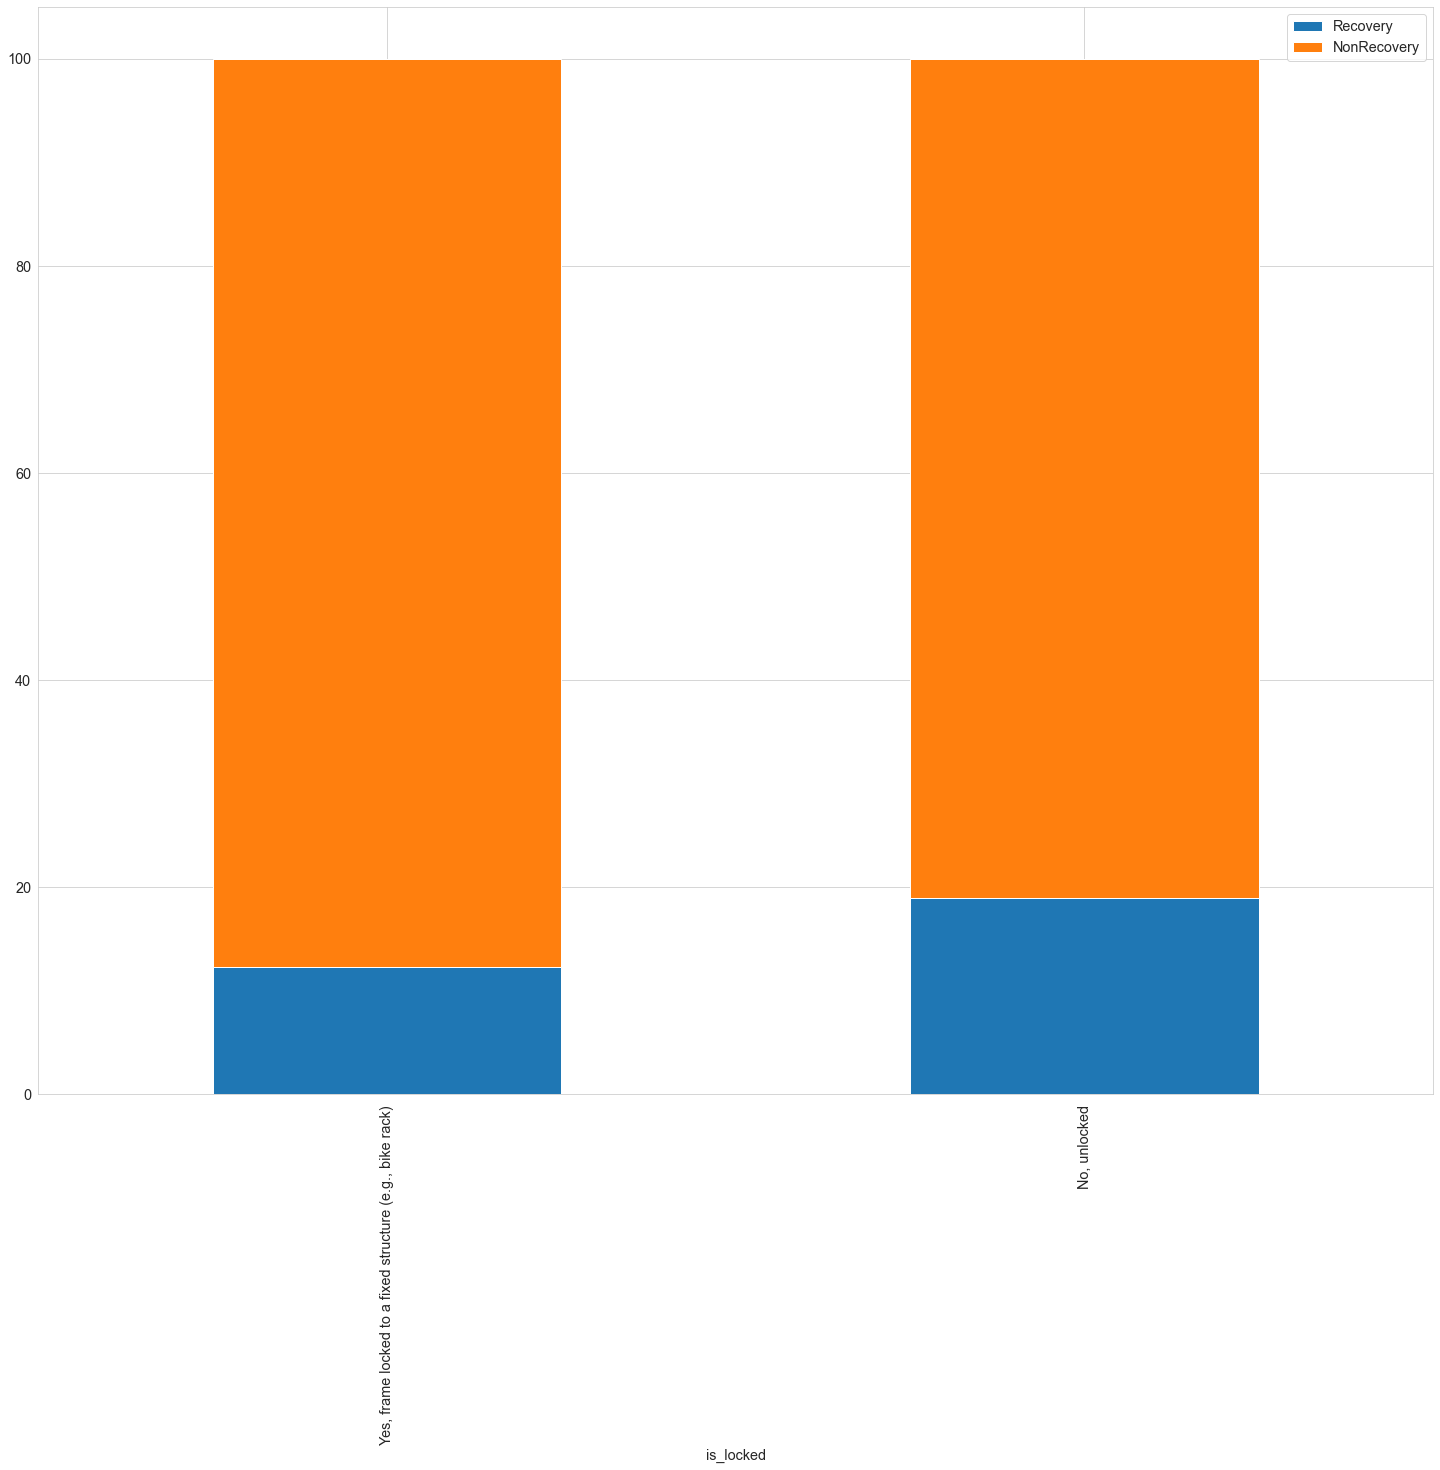

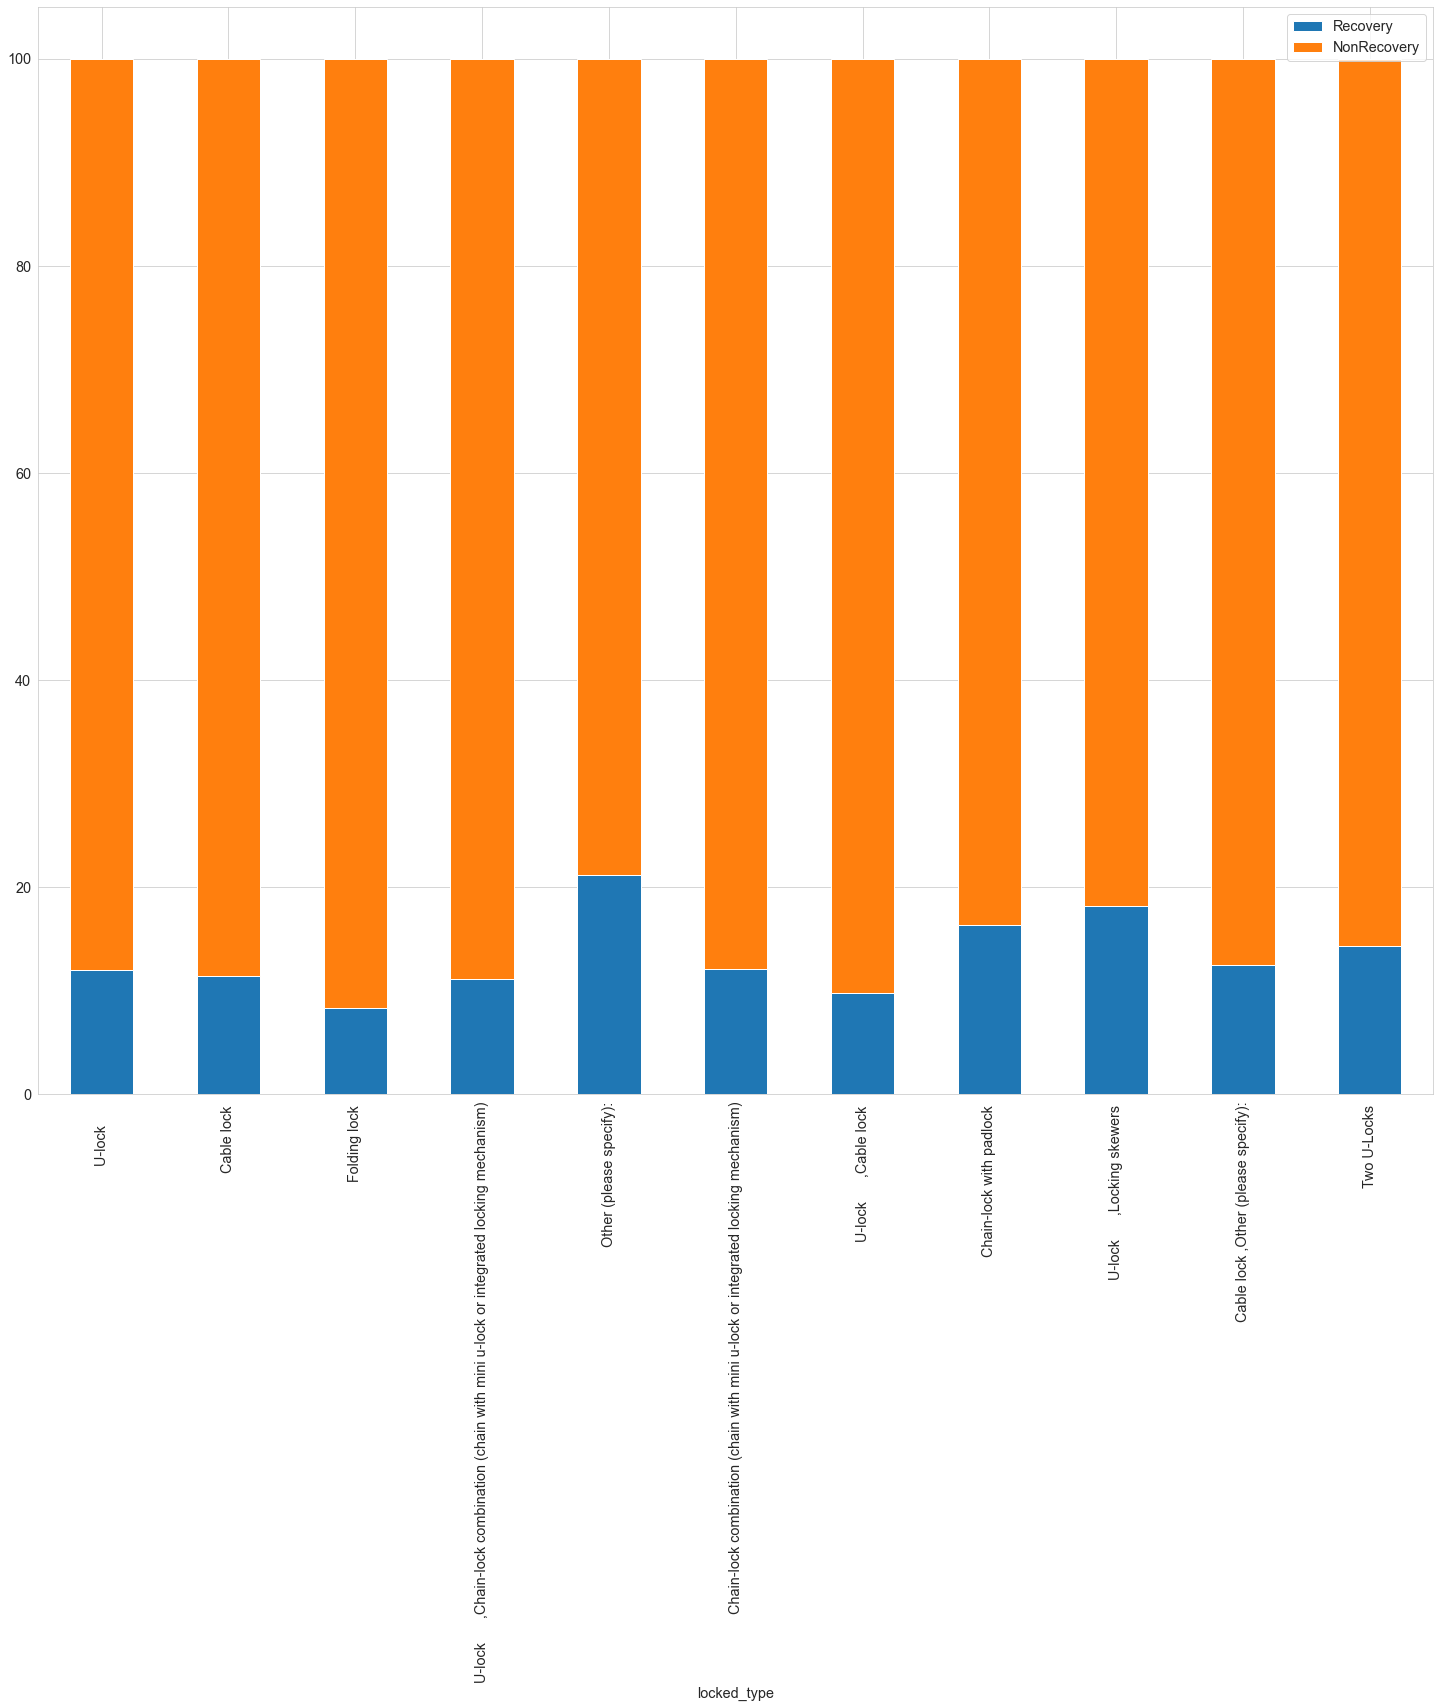

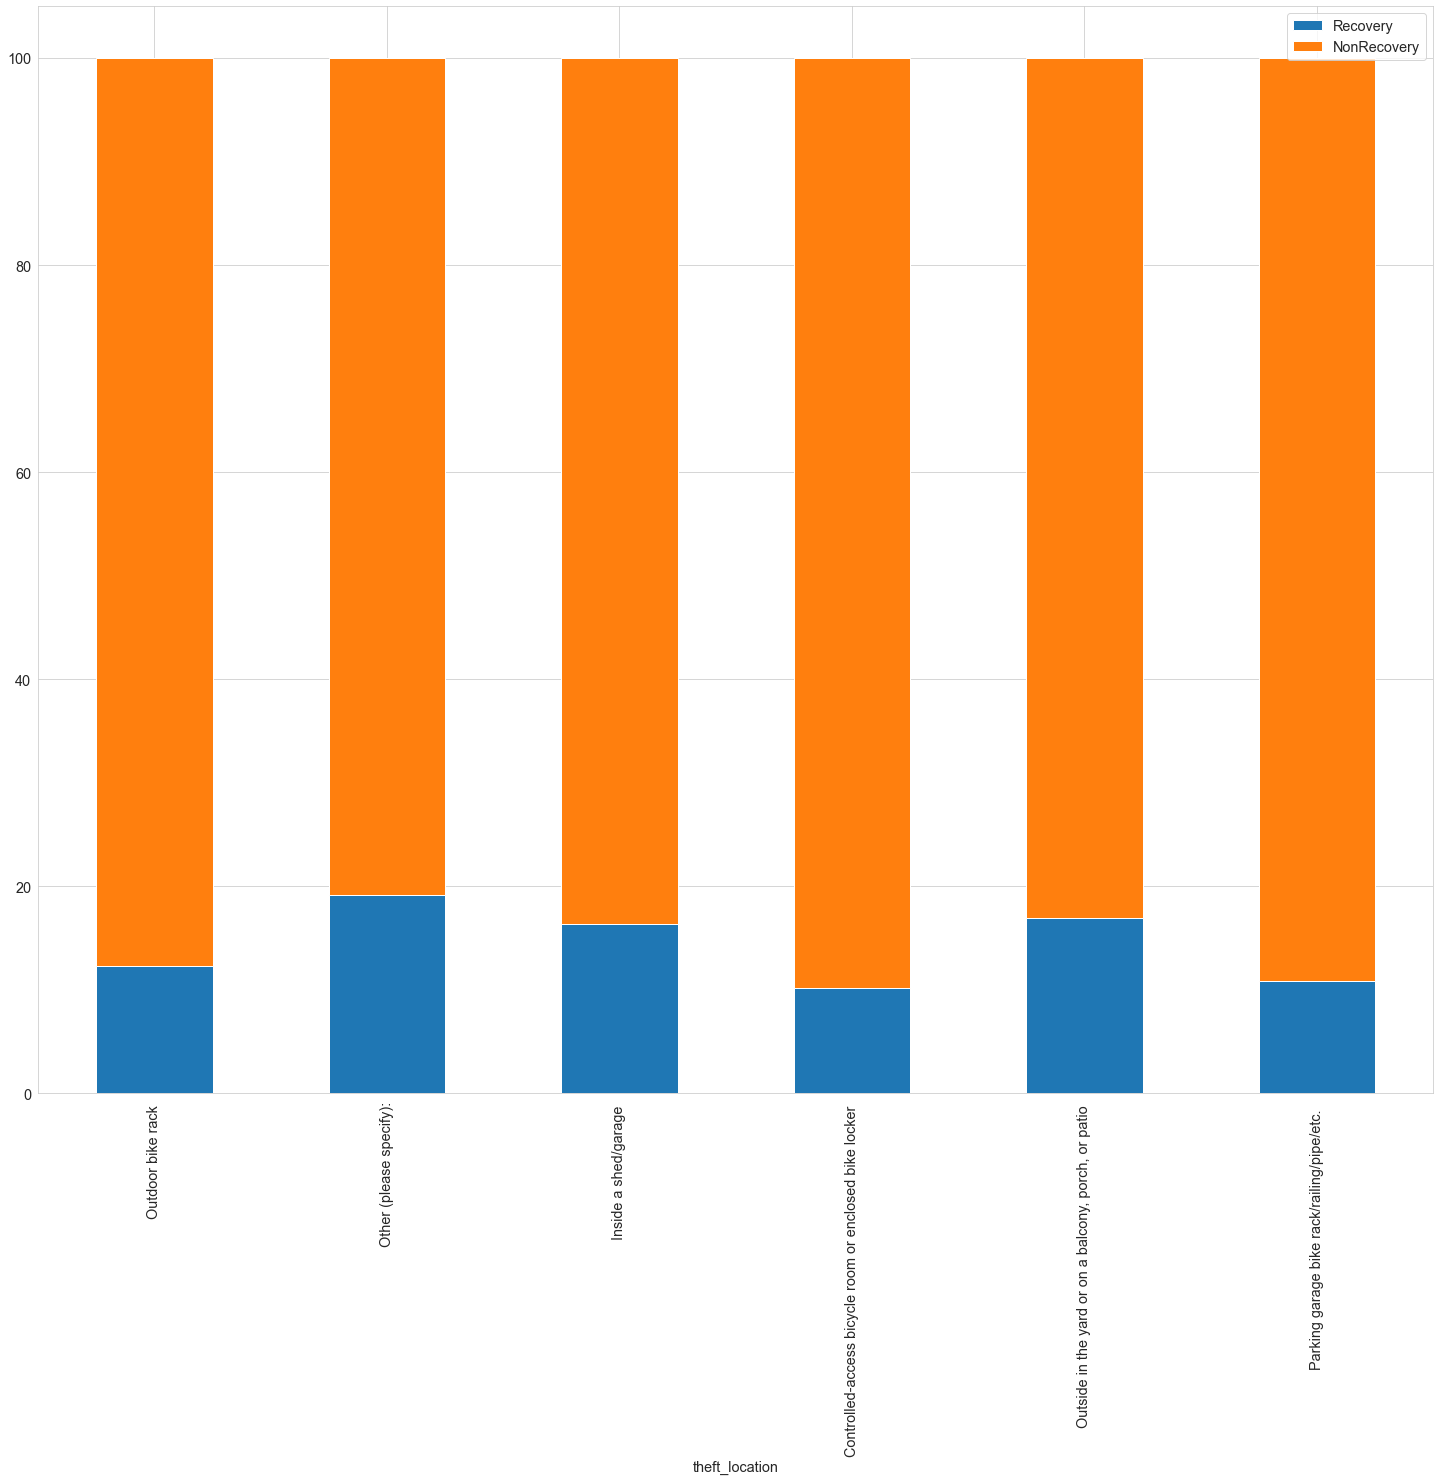

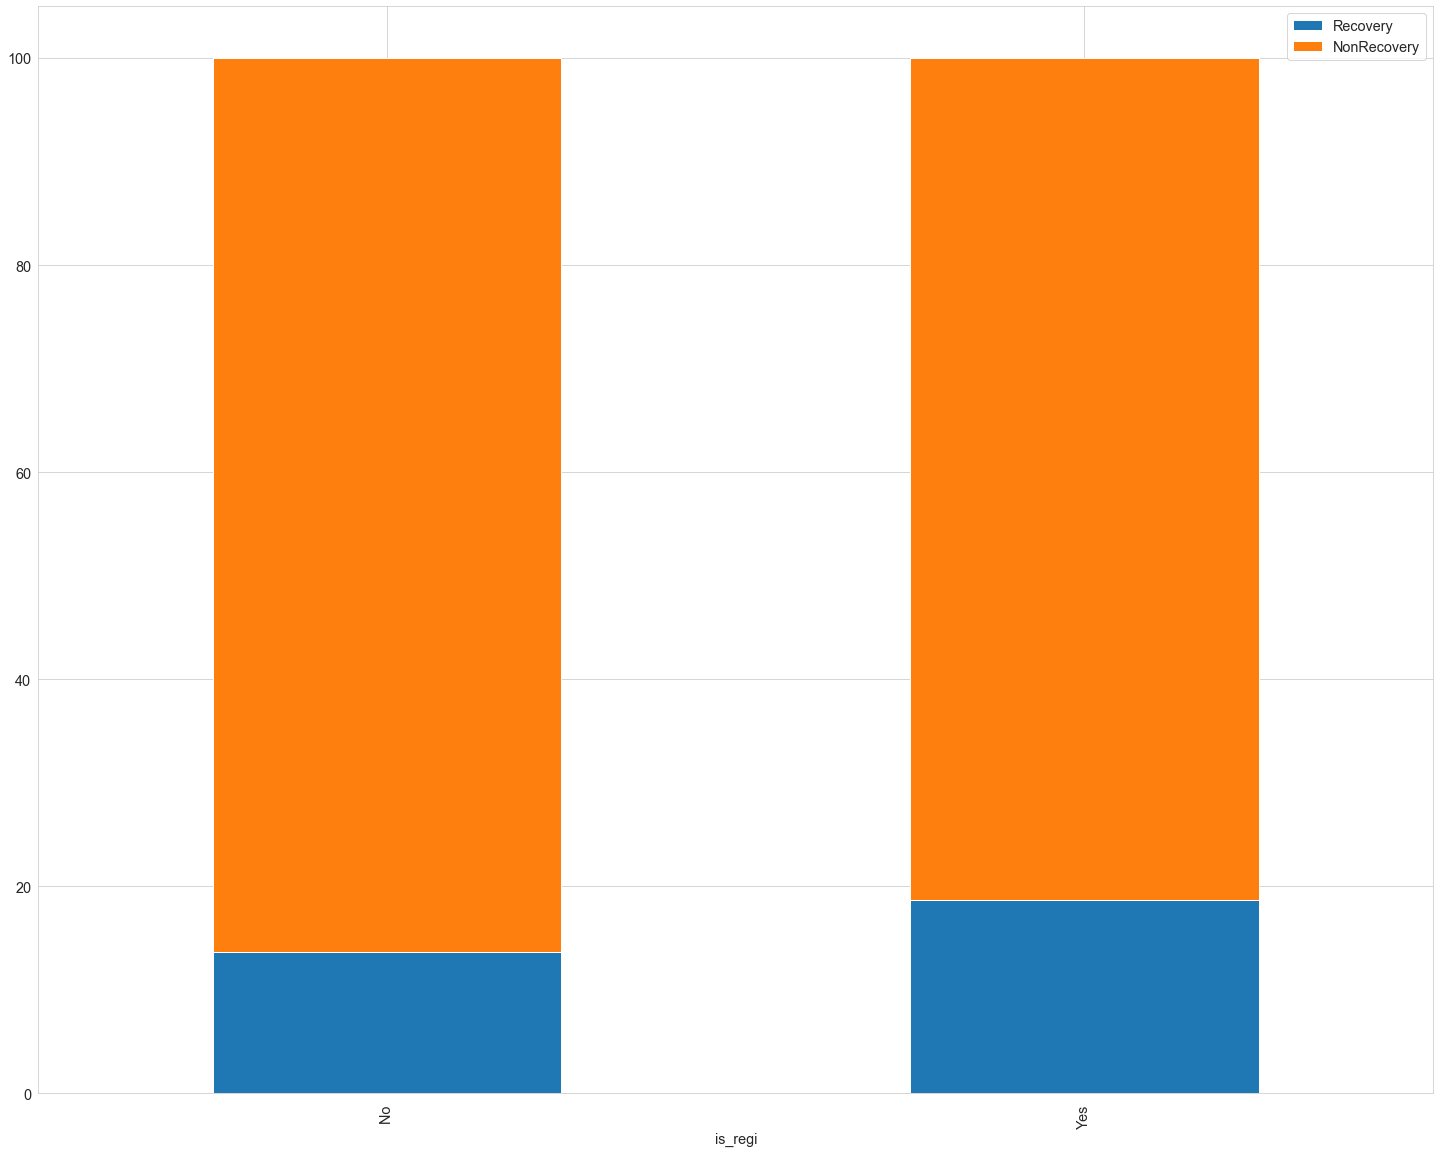

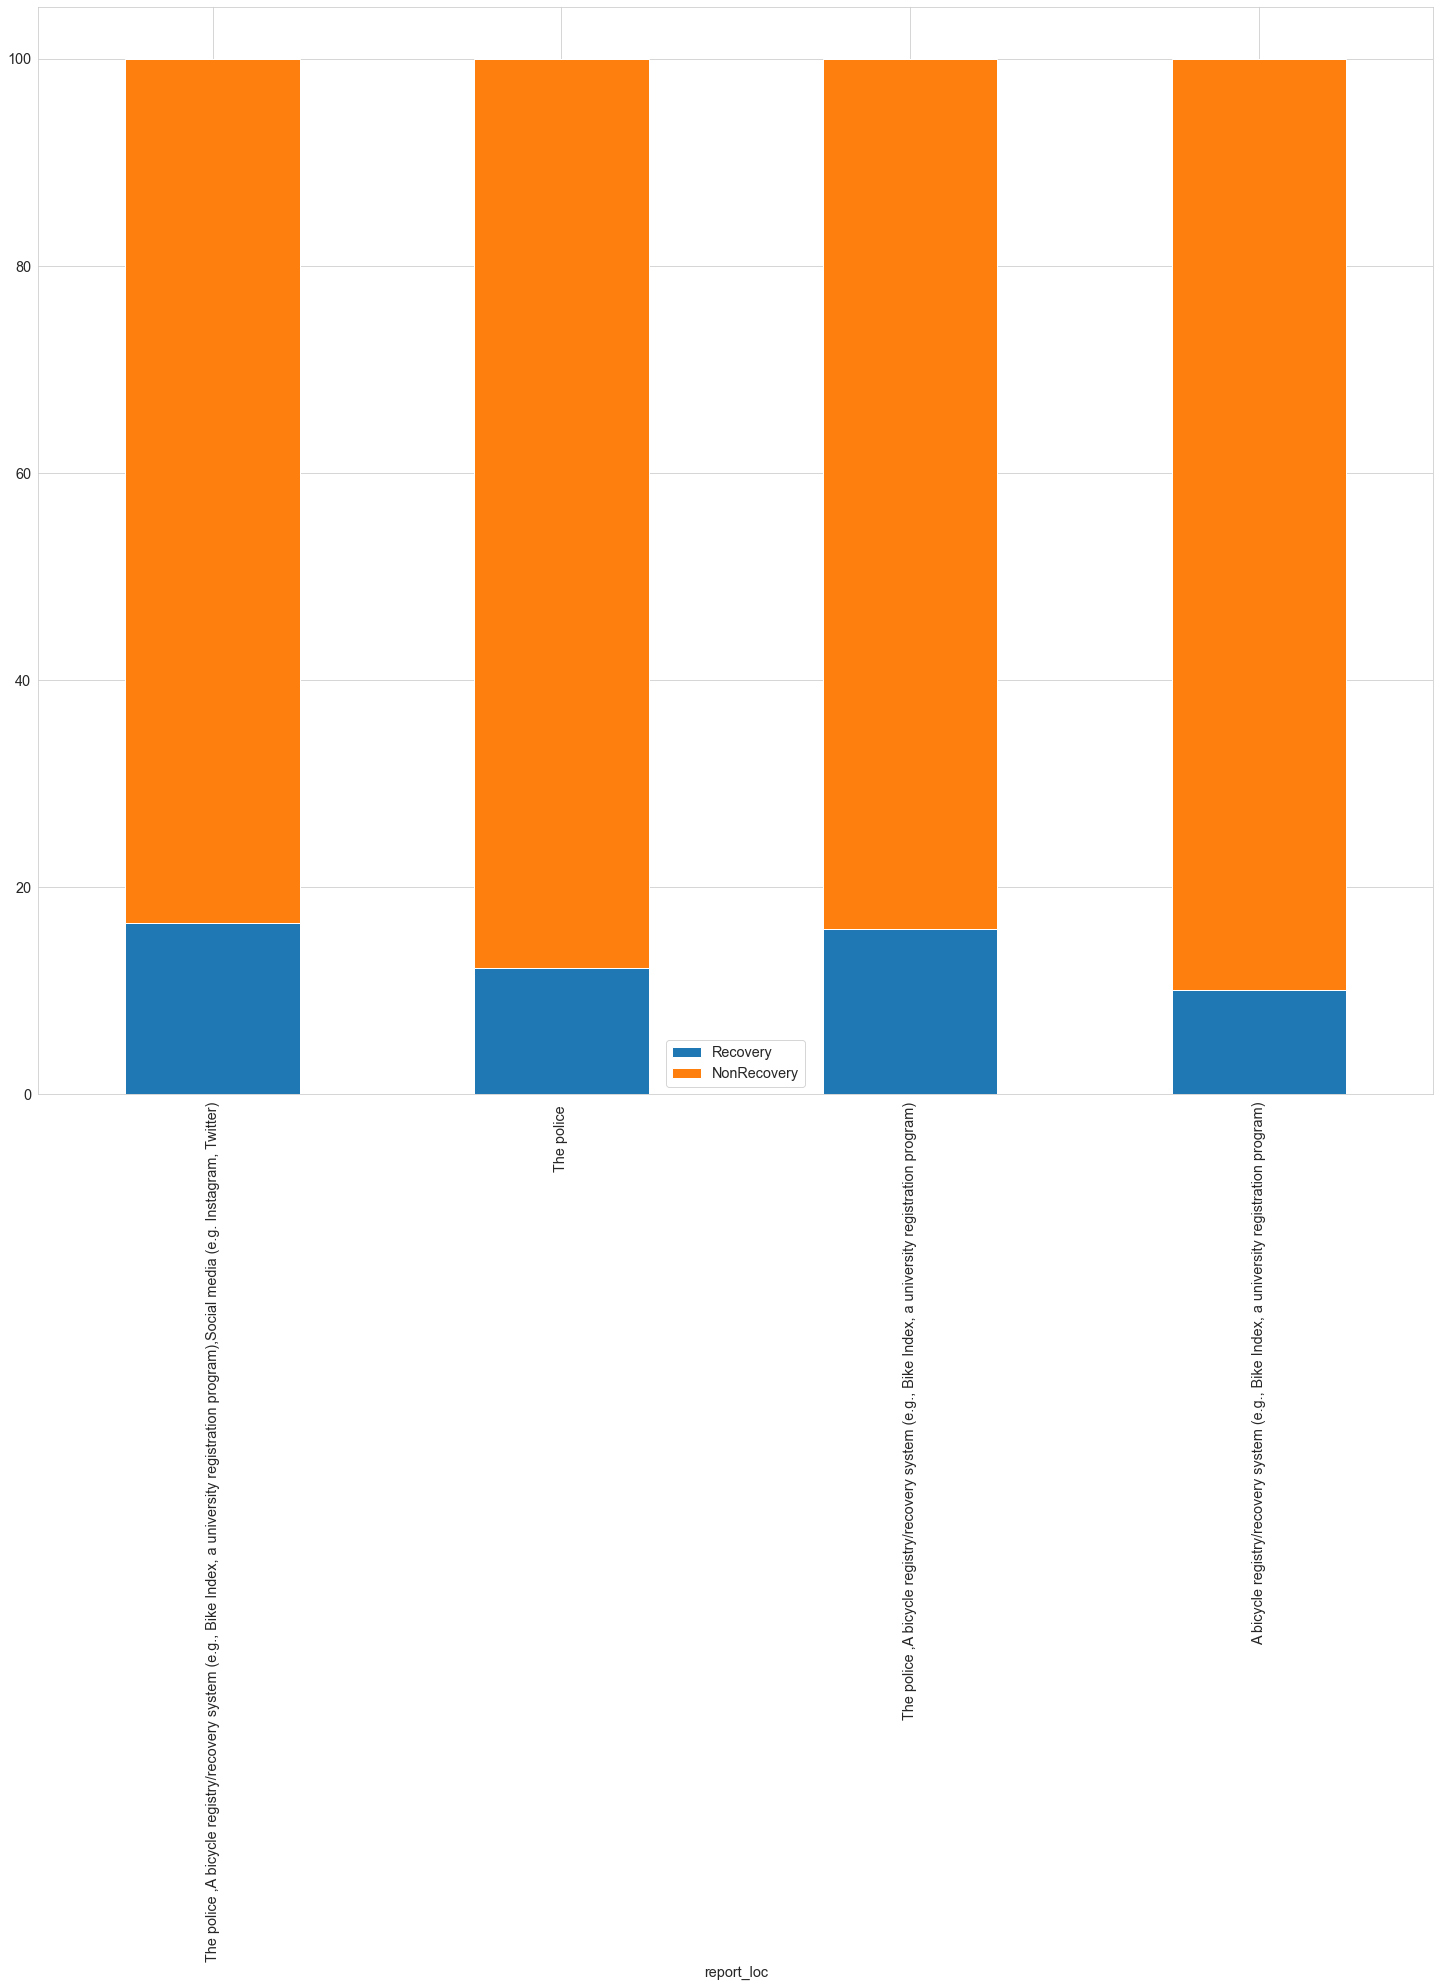

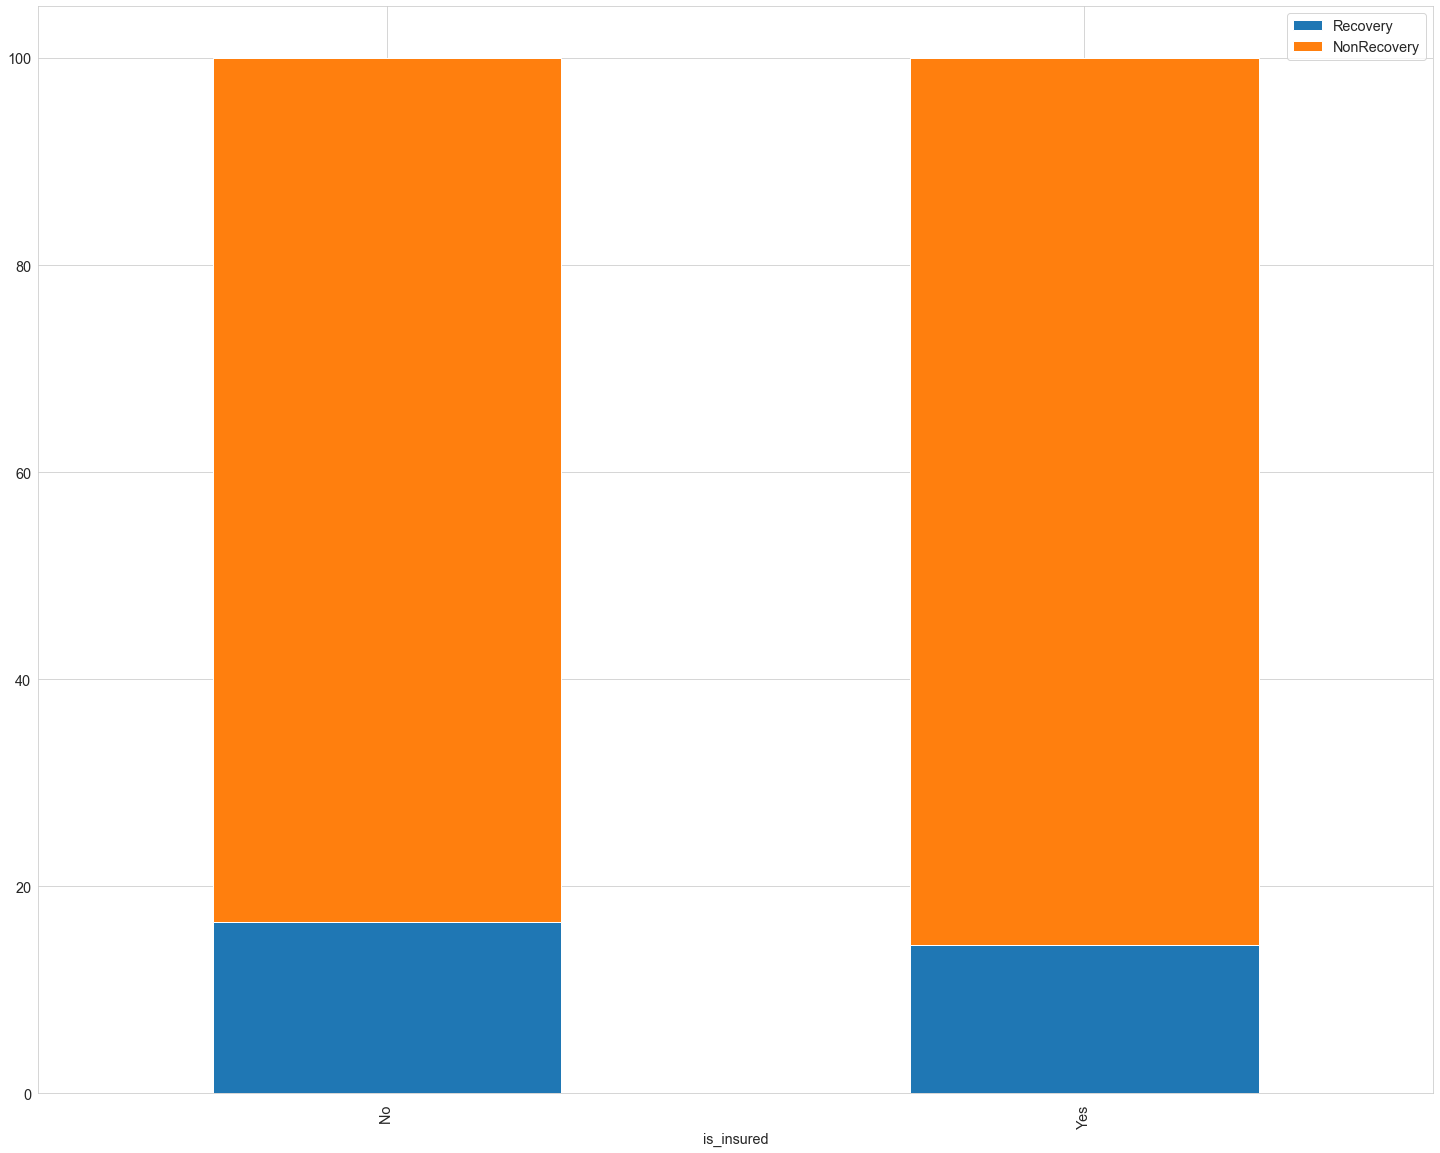

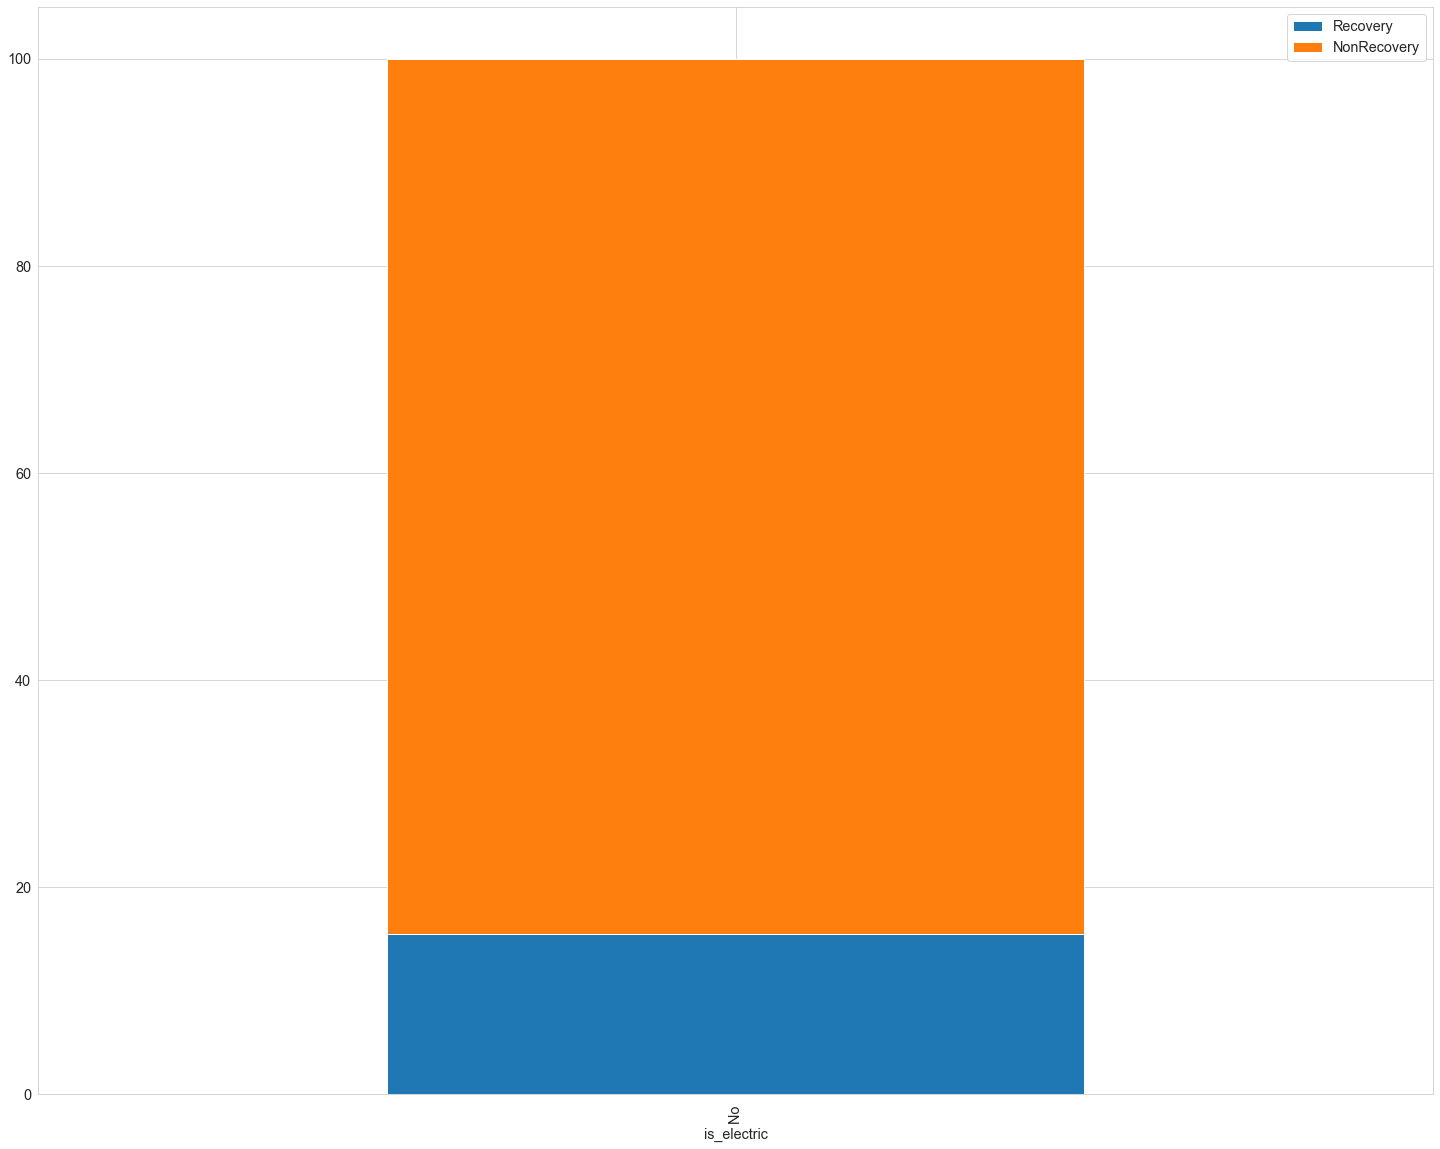

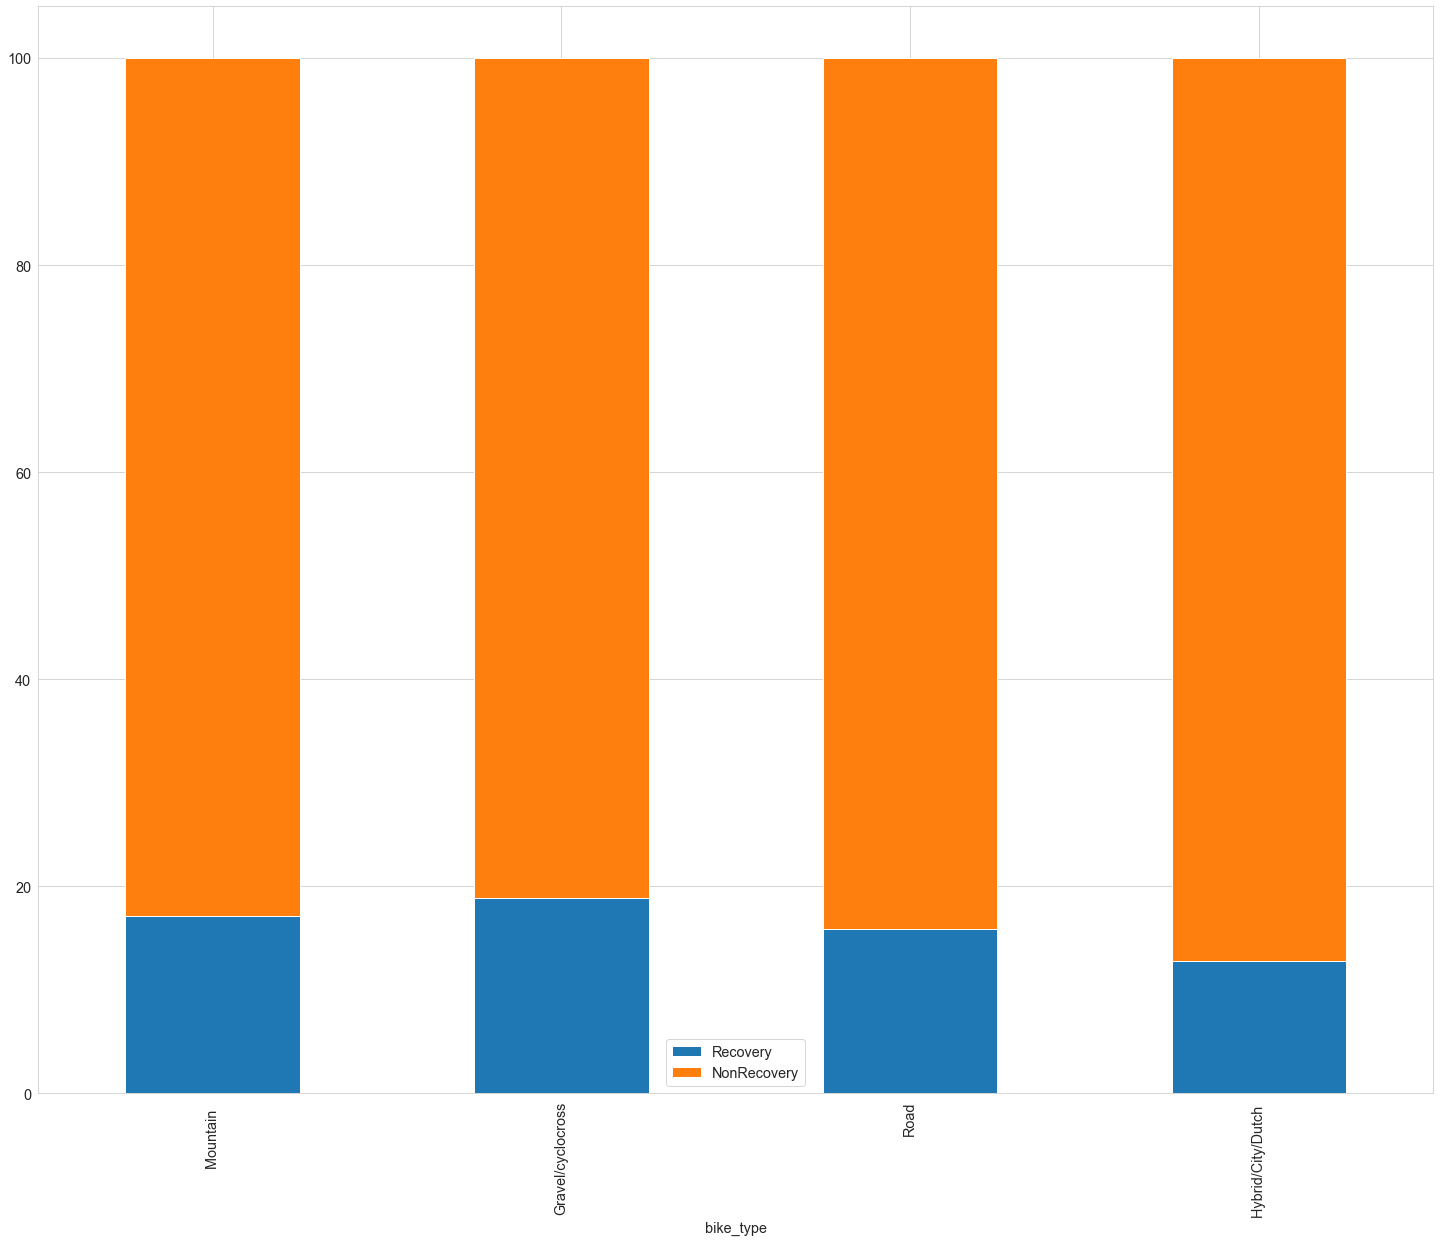

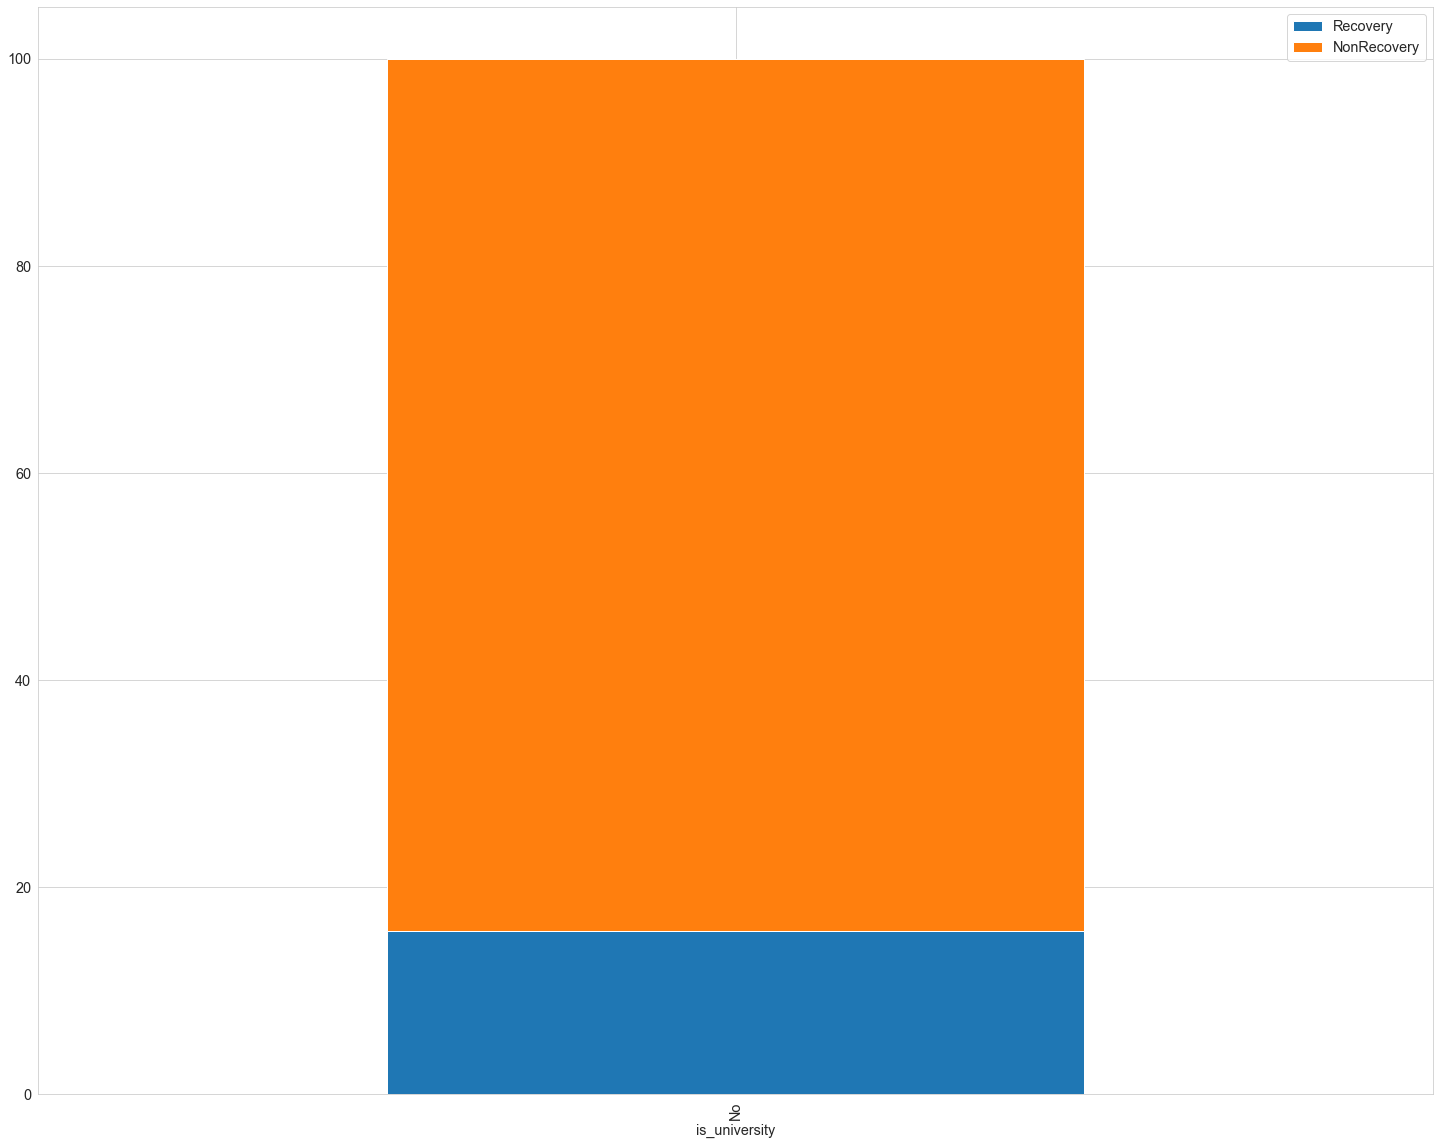

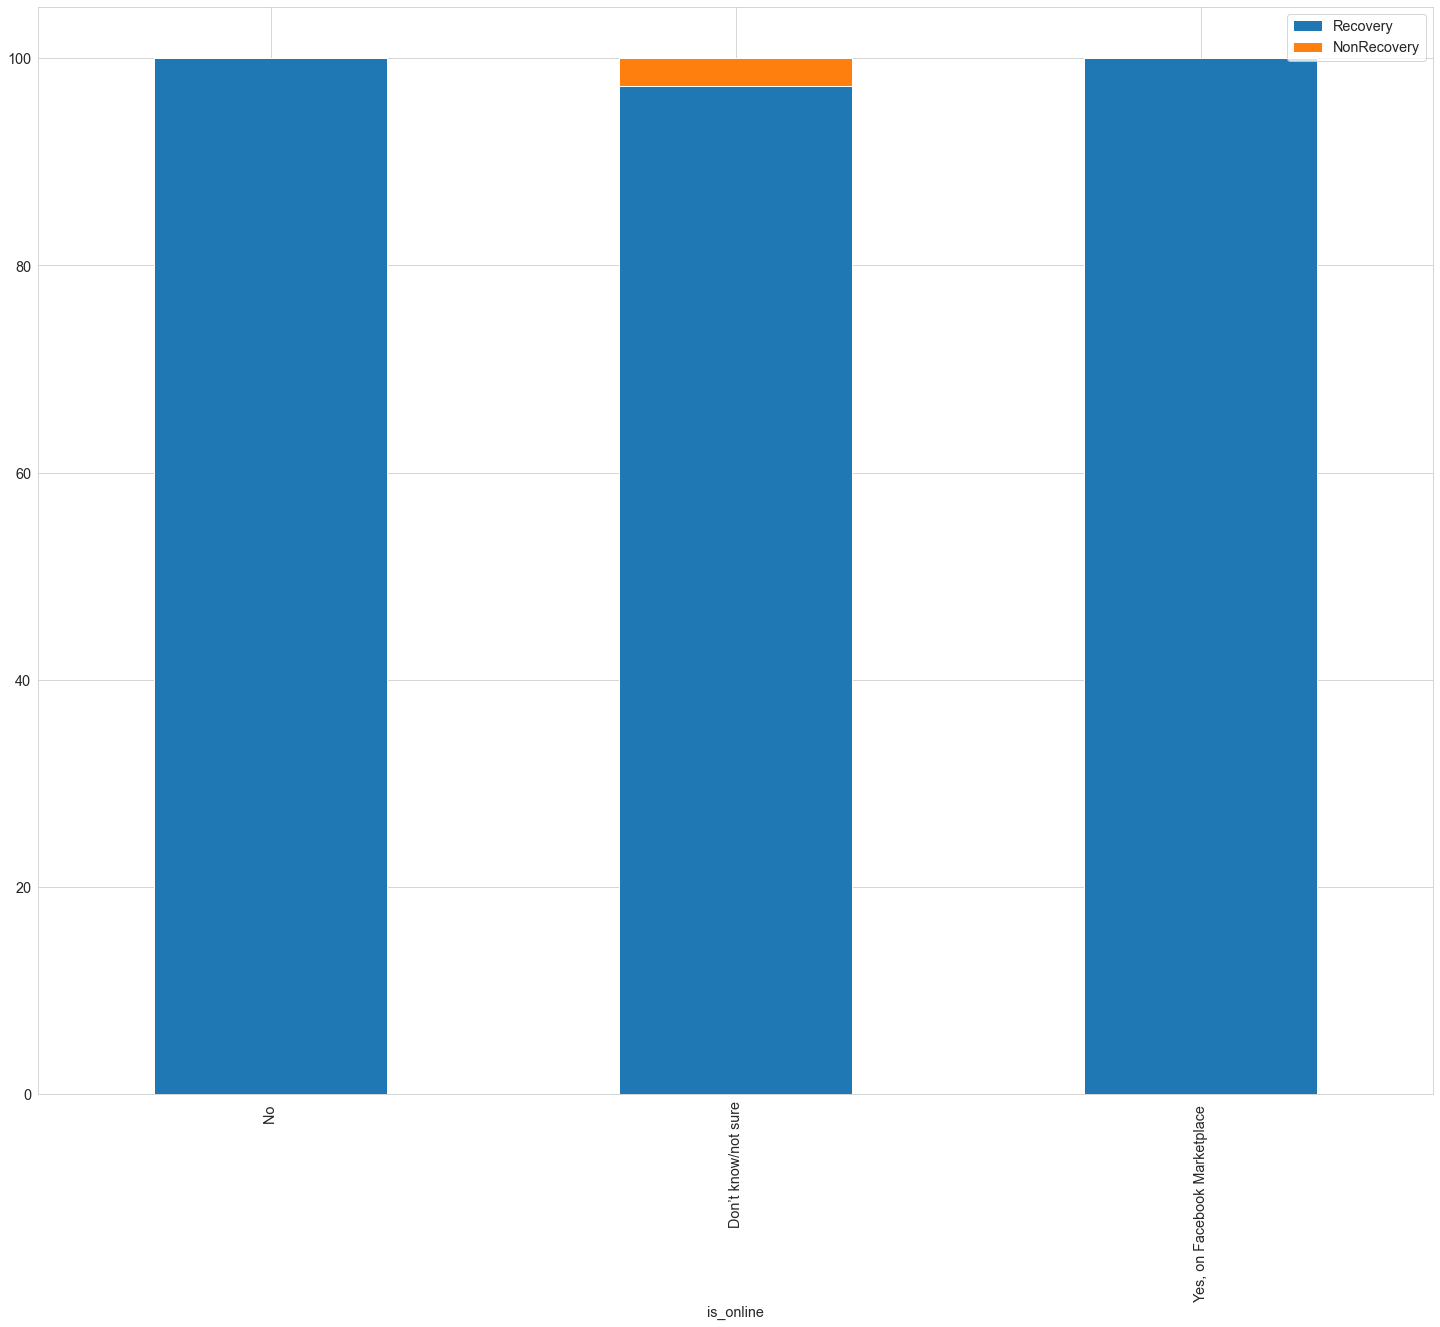

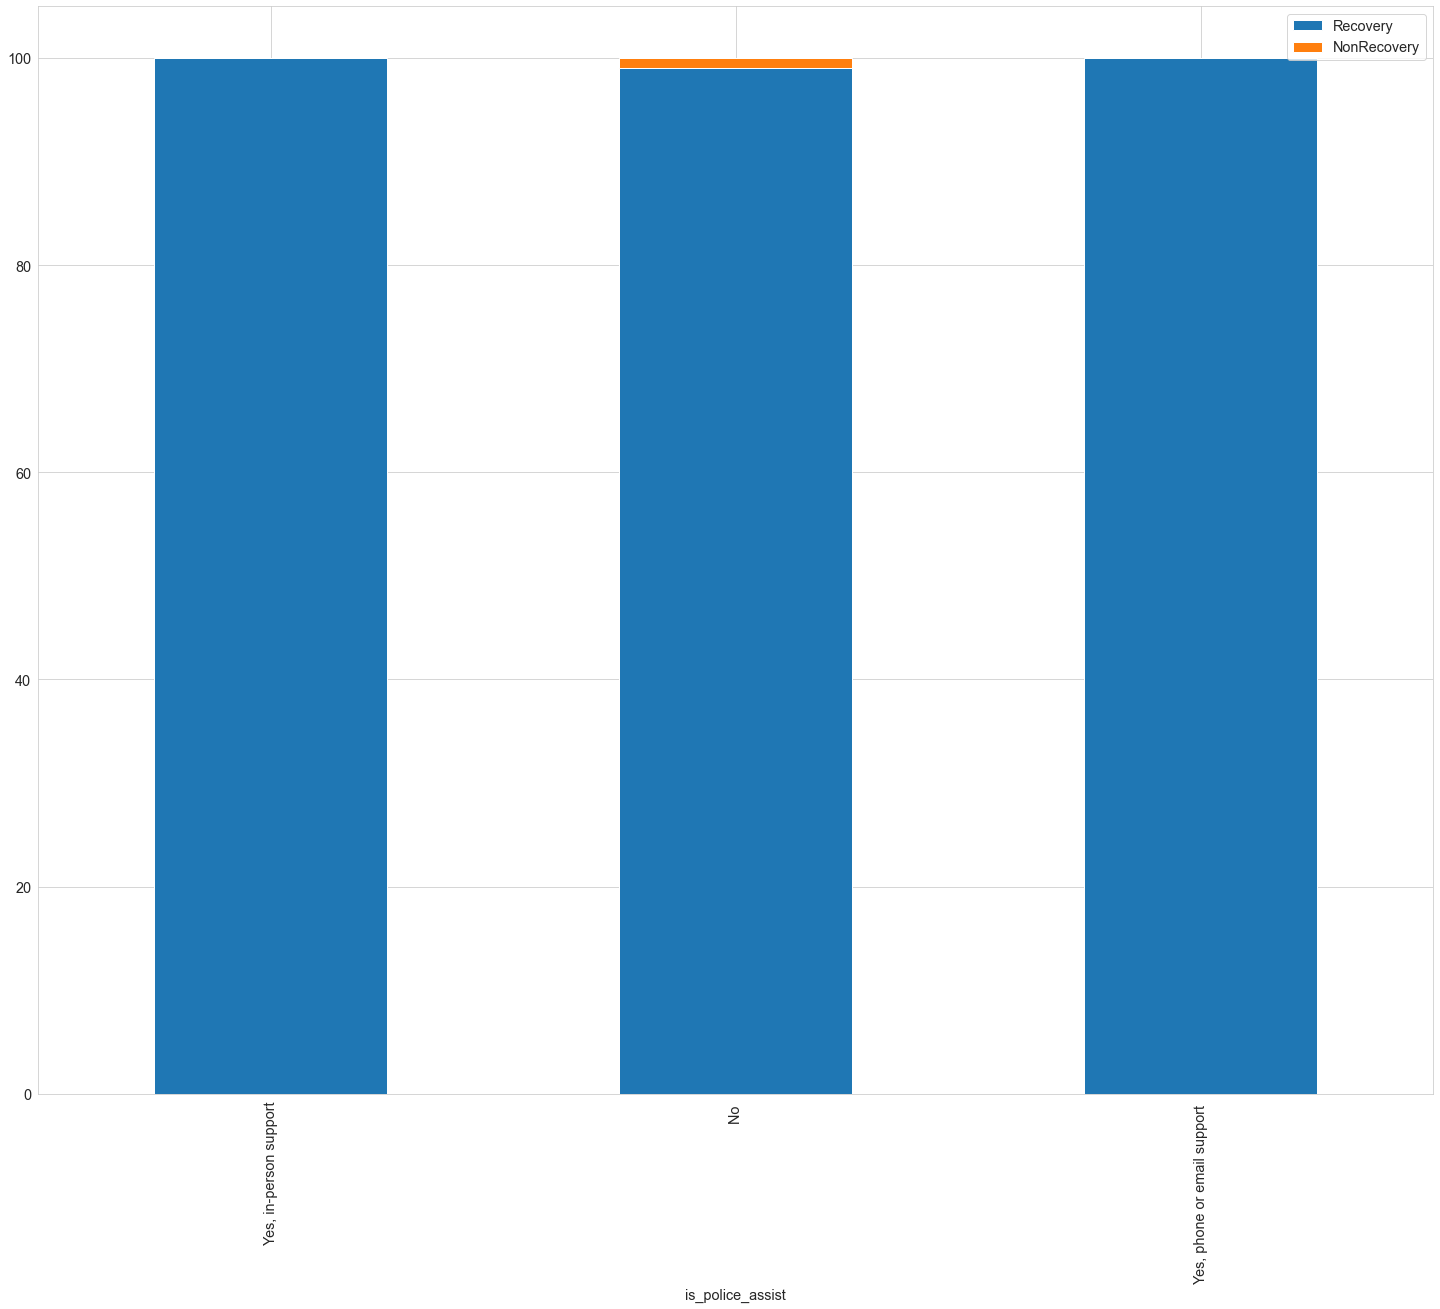

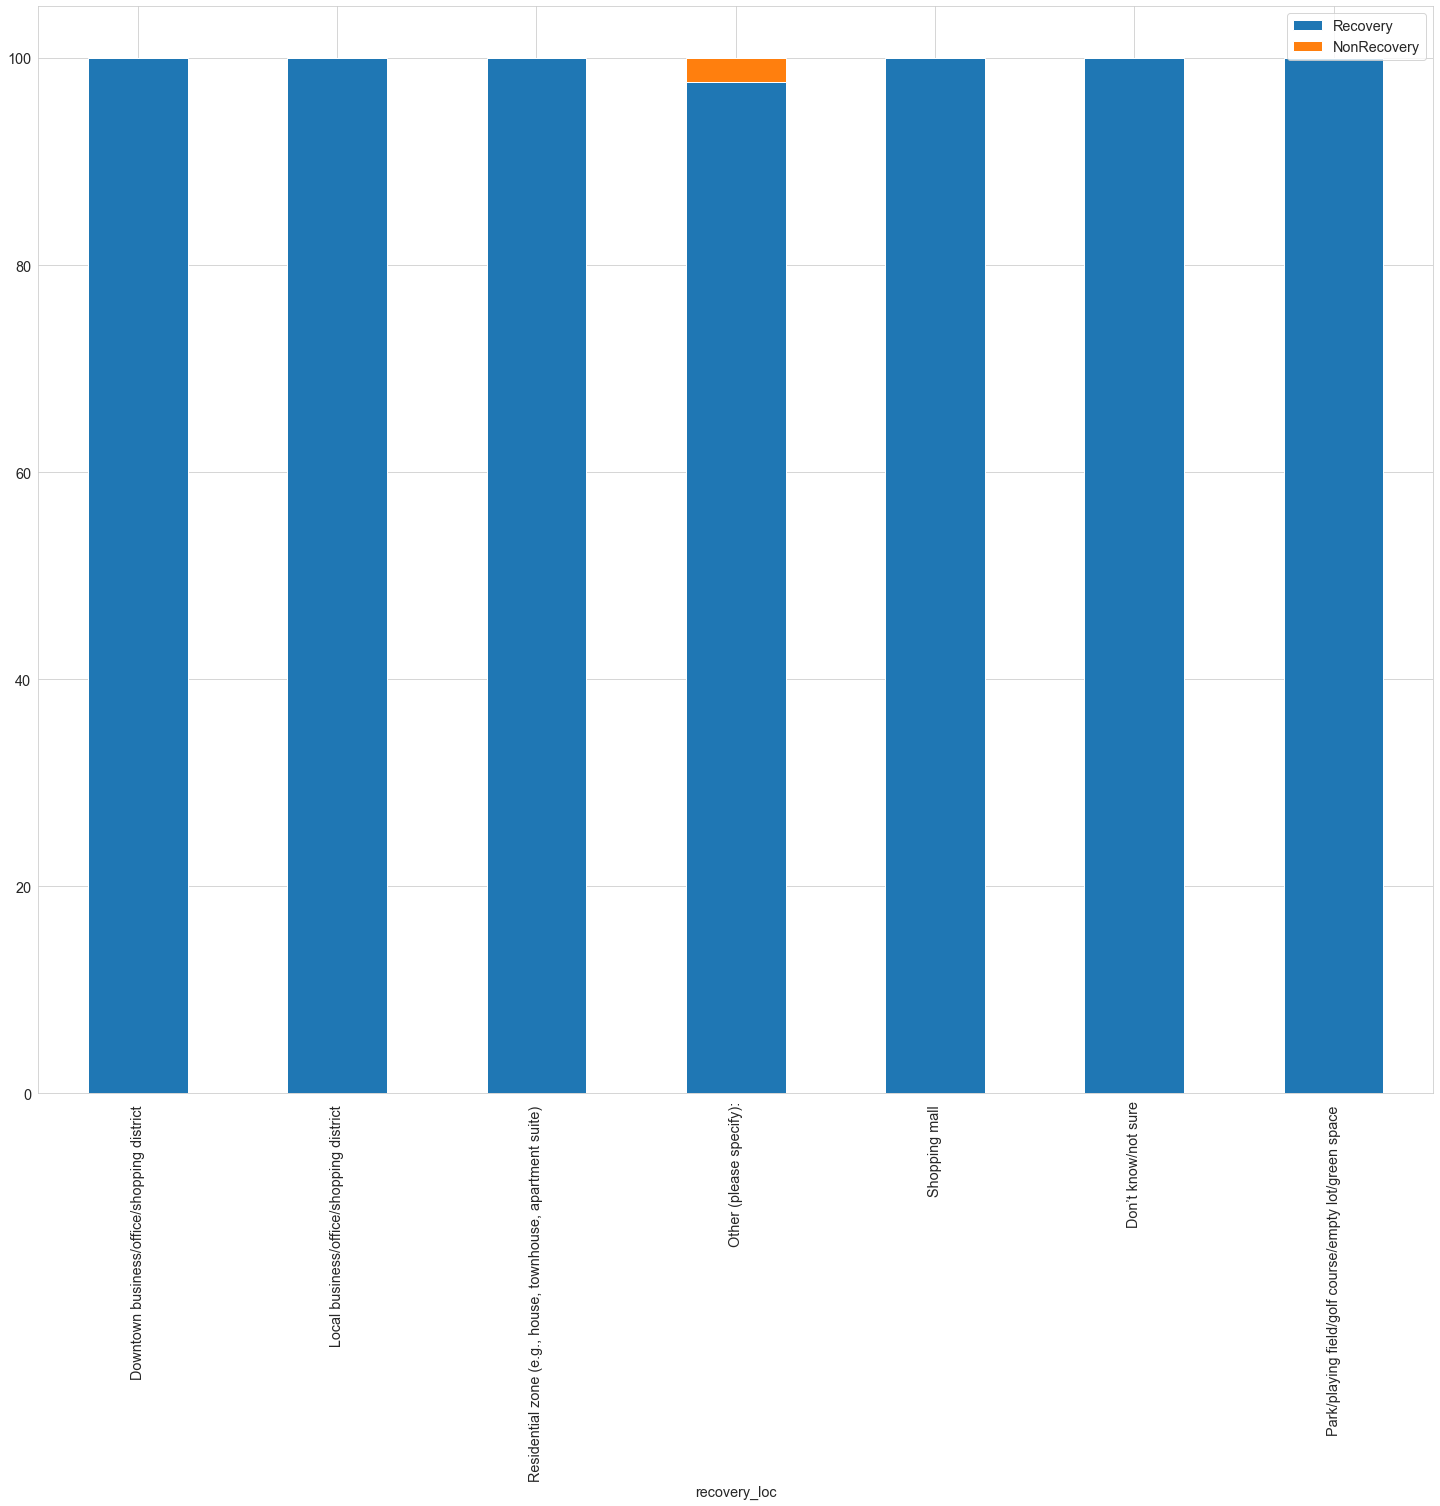

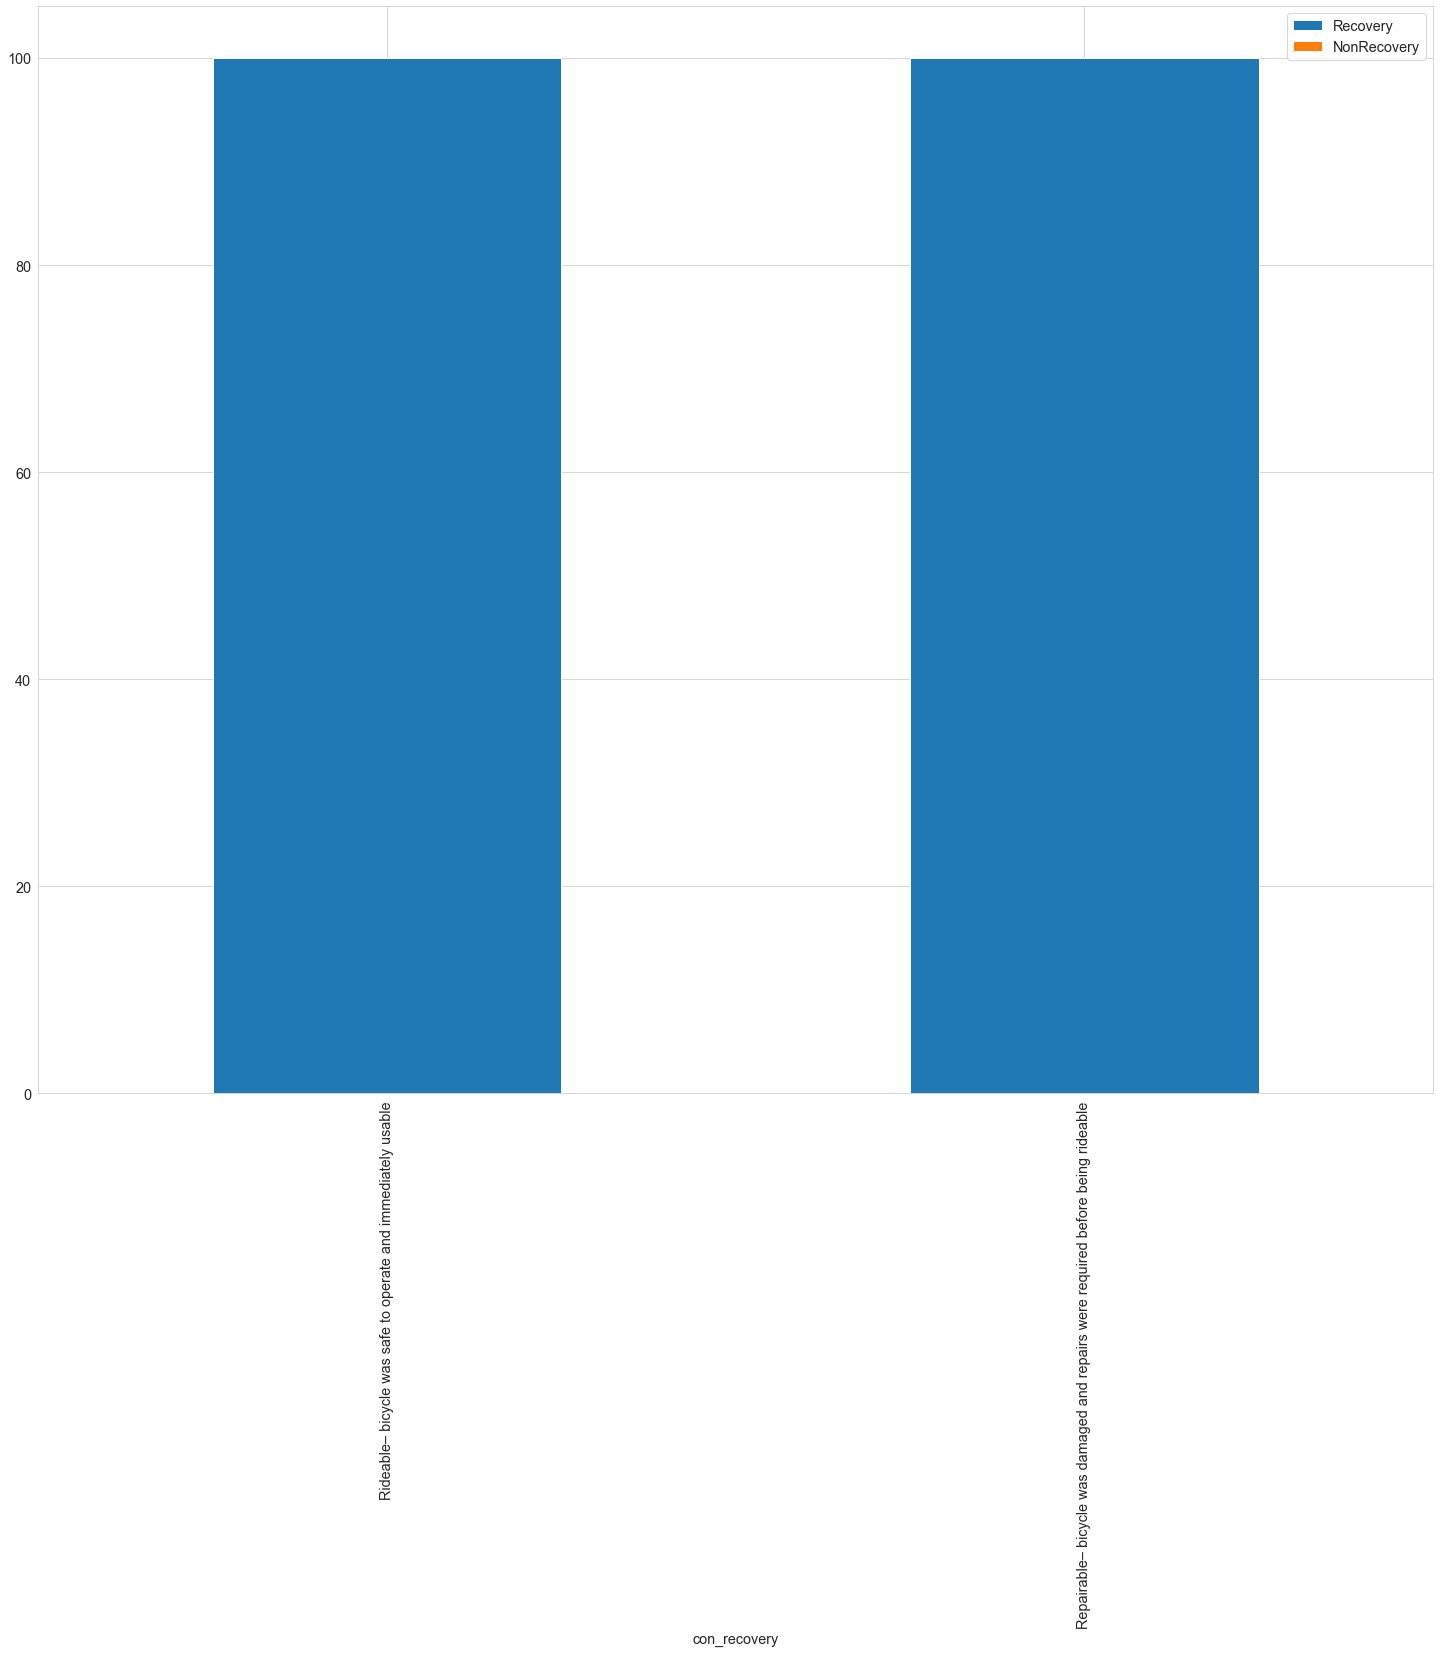

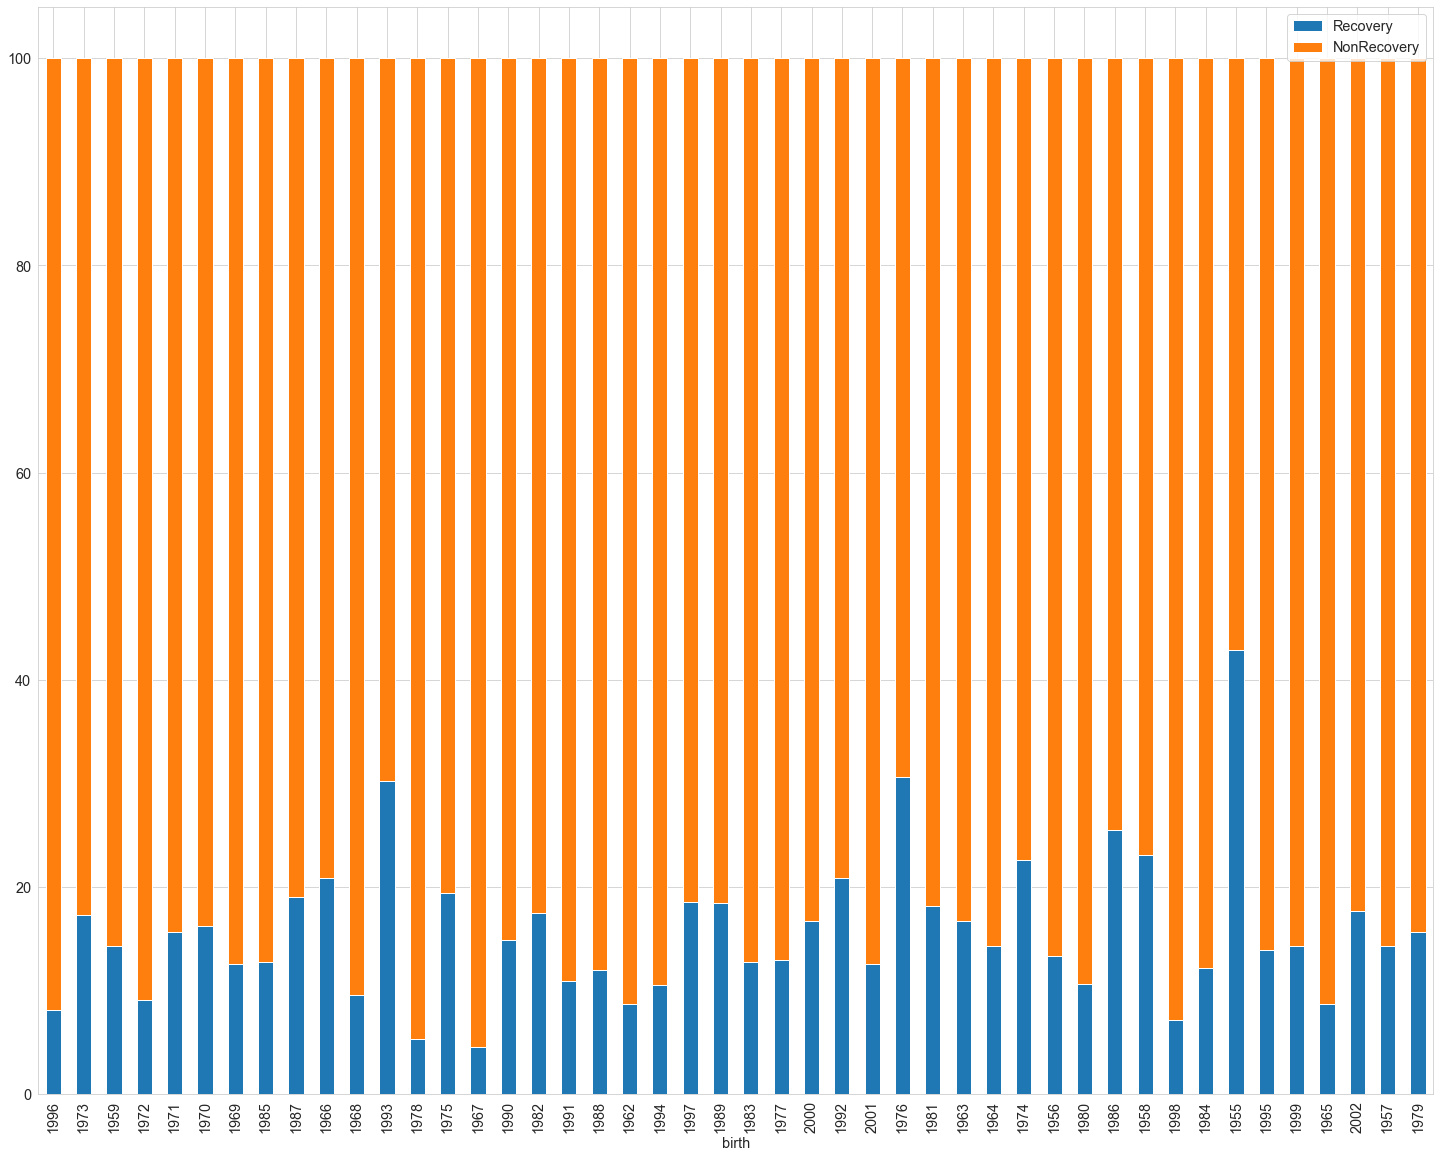

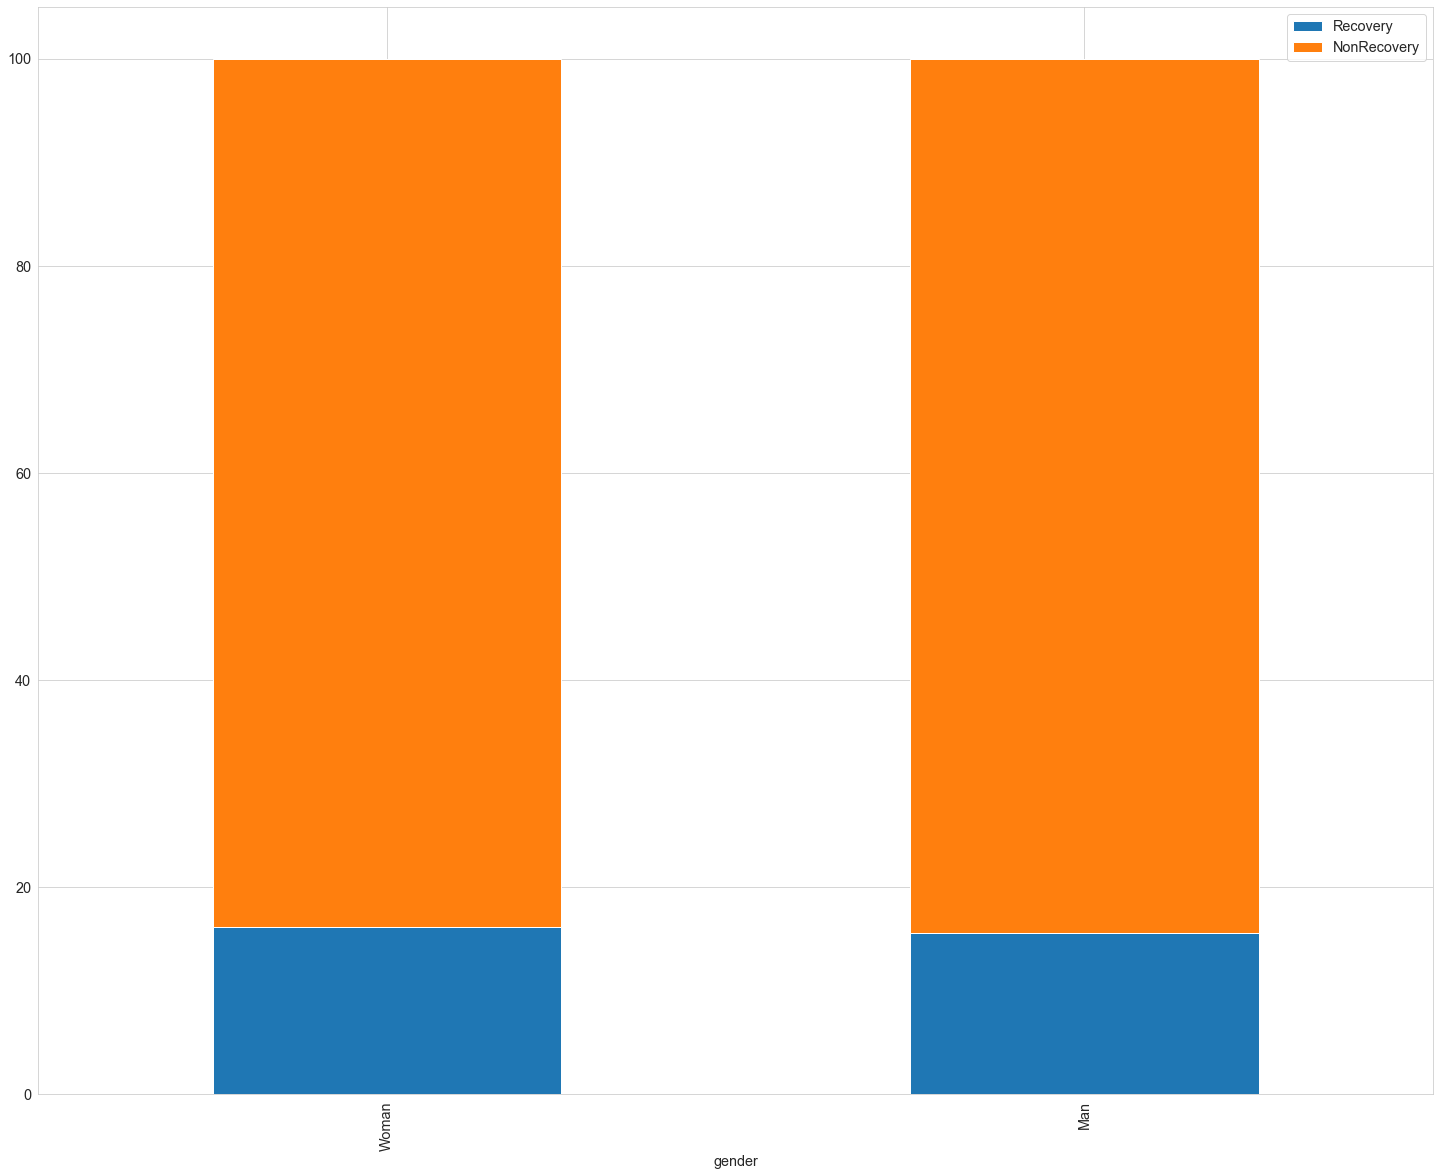

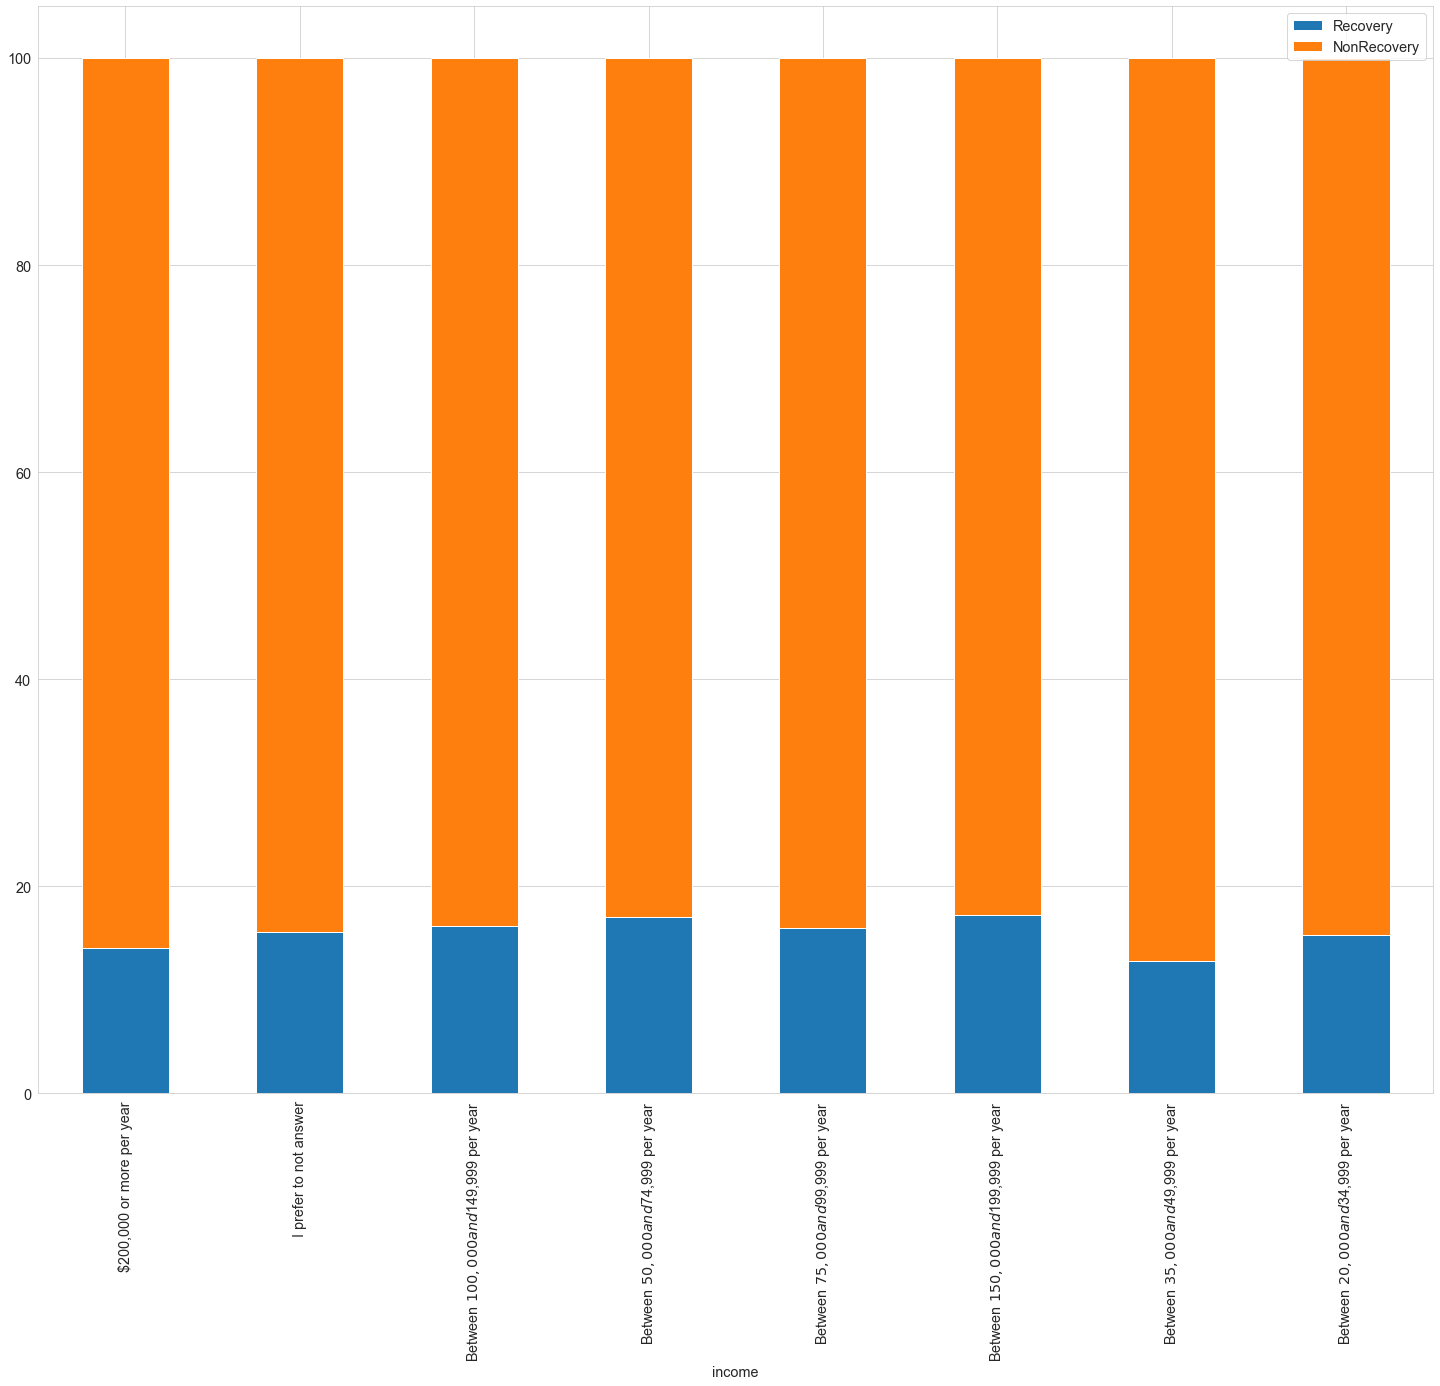

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


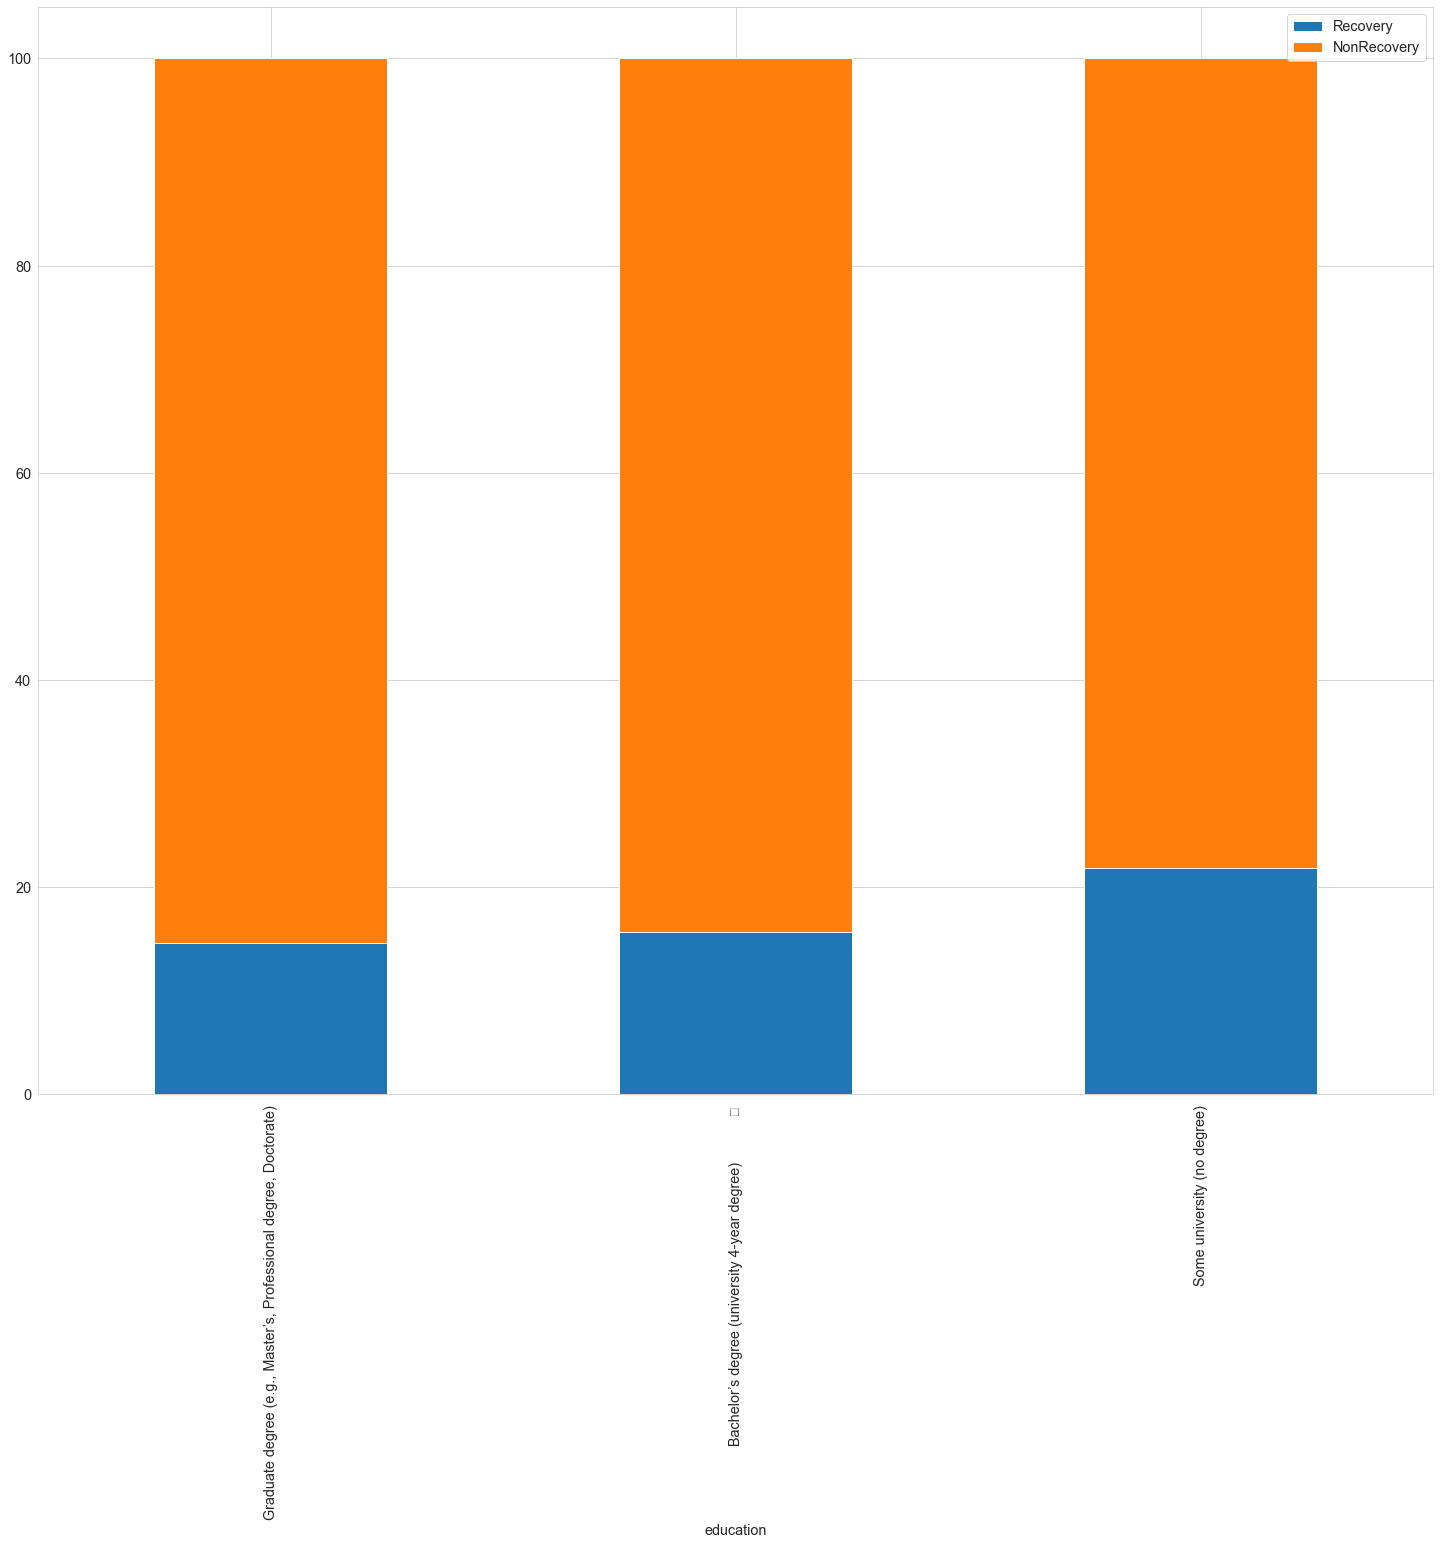

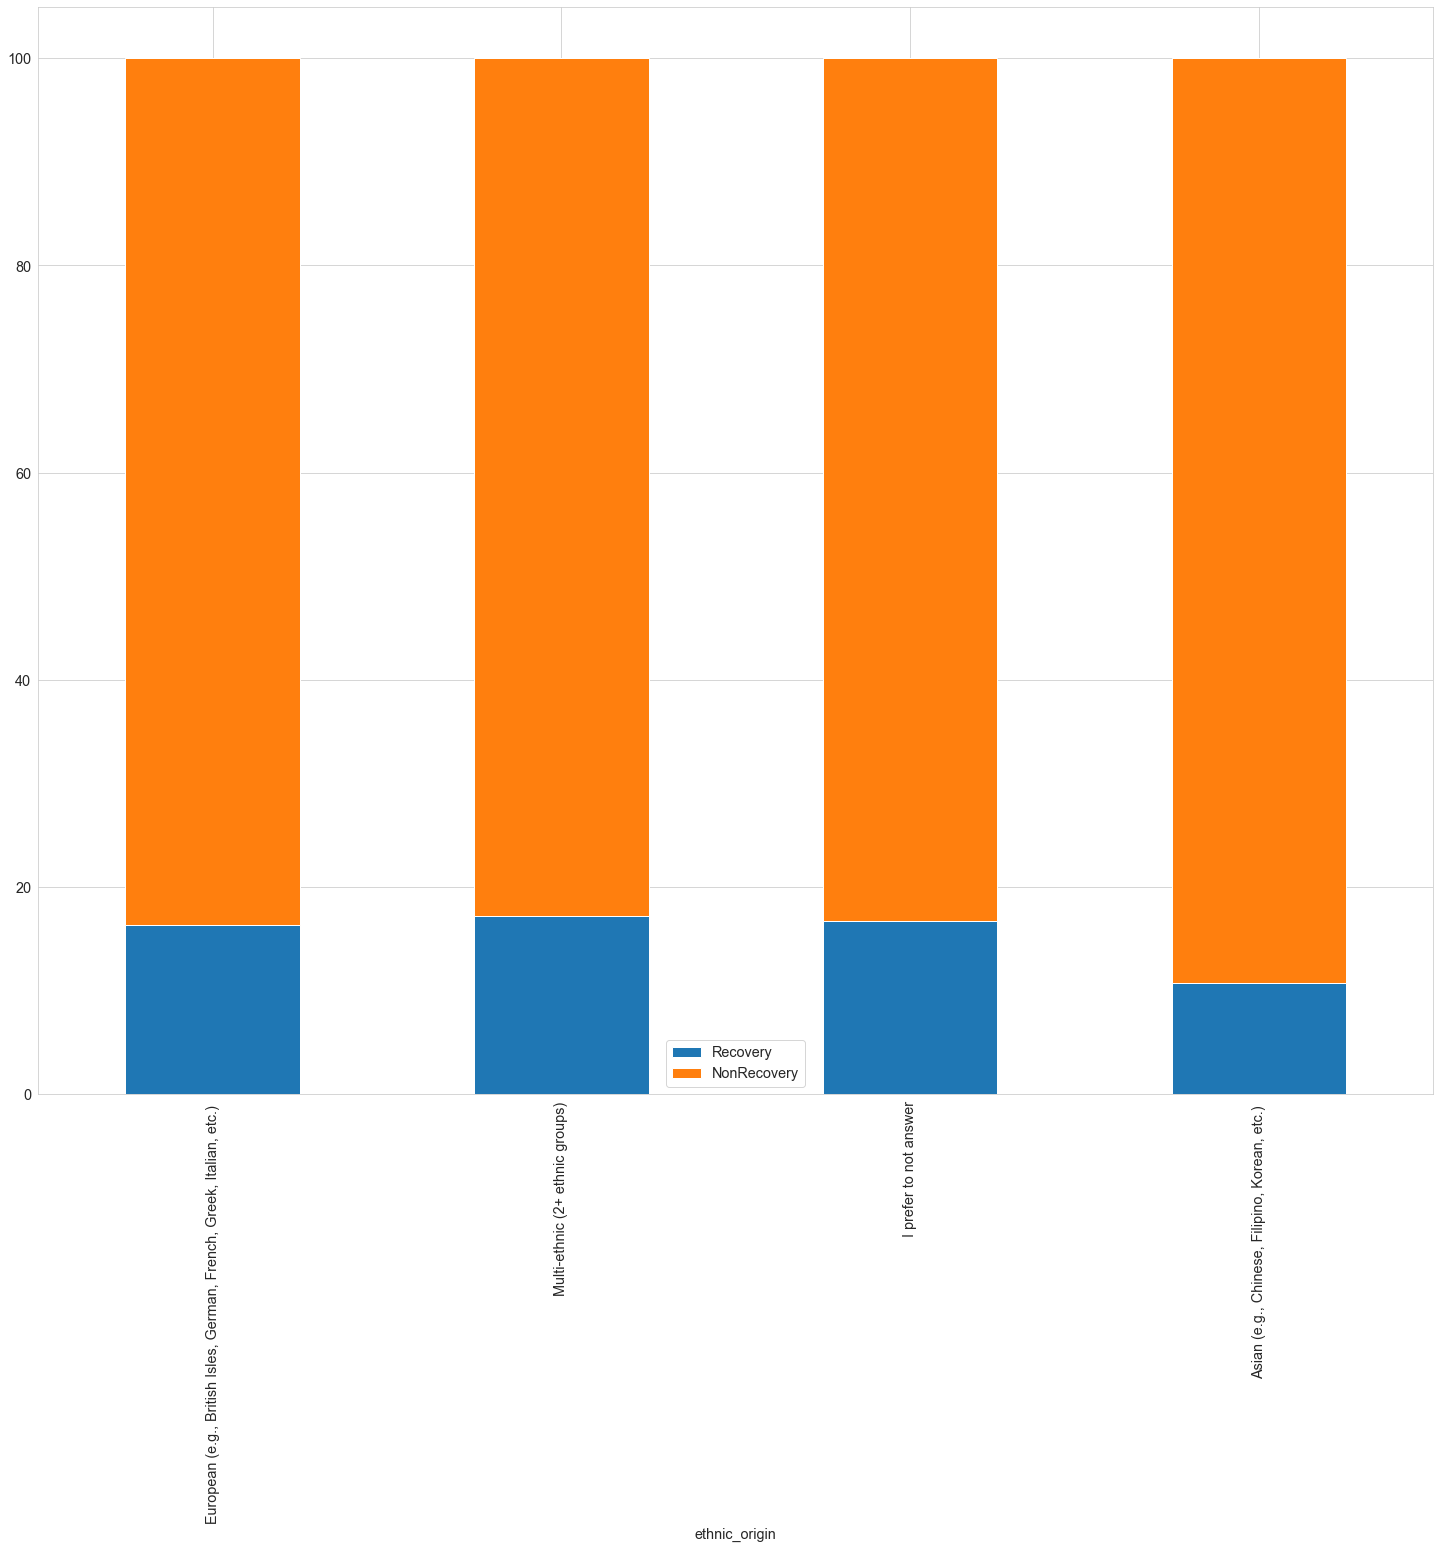

In [8]:
for dft in data_store:
    df= dft.copy()
    q_name = df.index.name
    print(q_name)
    # Calculate recovery-based distributions for the possible answers to a given question

    sum_per_answer = df.sum(axis=1)
    df[per_cols_by_ans] = df.div(sum_per_answer, axis=0)*100

    # Less popular answers  should be removed, which is relative to the number of possible answers
    temp_sum = df[cols].sum().sum()
    tolerance = temp_sum/(len(df)*2)
    rem_df = df[sum_per_answer<tolerance]
    print('those are not include in the results presentation since less than {} tolerance  {}'.format(tolerance,rem_df.index.values))
    new_df = df[sum_per_answer>tolerance]
    # Make a table to export with the real and relative (%) values on the same column
    df_table= DataFrame(columns=cols)
    df_table[df_table.columns] = new_df.apply(lambda x: prep_for_export(x),axis=1)
    df_table.to_csv('python/notebooks/output/per_recovery/csv/'+q_name +'.csv')
    df_table

    # Plot the results and save them on the disk
    df_show= DataFrame(columns=cols)
    df_show[cols] = new_df[per_cols_by_ans]
    df_show.plot.bar(stacked=True)
    plt.savefig('python/notebooks/output/per_recovery/figs/'+q_name+'.png')

    # Indicate when there is interesting results
    find_max= df_show.copy()
    # res save the index of the one with max absolute distance from the average
    res= (abs(find_max.mean() - find_max).idxmax())
    def is_intersting_def(temp_col):
        df_filter = temp_col.reset_index() # Move the question to a column
        outlier_place = df_filter.columns[-1]  # The state to examine
        outlier_att = res[outlier_place] # A possible outlier answer

        # The value for  the possible outlier answer
        is_intersting = df_filter[df_filter[q_name]==outlier_att]
        val_outlier = is_intersting[outlier_place]
        val_outlier
        # Determine the mean and standard deviation without taking into account suspicious outlier
        not_outlier = df_filter[df_filter[q_name]!=outlier_att][outlier_place]
        new_mean = not_outlier.mean()
        new_std = not_outlier.std()
        # Test to determine if it is an outlier and to find out if the results are interesting
        if (abs(val_outlier - new_mean) - new_std*2.5  > 0).any():
            print ('for {} ({}) : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,round(val_outlier.values[0],2),outlier_att,round(new_mean,2),round(new_std,2)))
    res =find_max.apply(is_intersting_def)